<a href="https://colab.research.google.com/github/XTMay/ML_DL/blob/main/Resource/%E5%AE%8C%E6%95%B4%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E6%B5%81%E7%A8%8B%E6%BC%94%E7%A4%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 完整机器学习流程演示

## 📋 项目概述

本项目演示完整的机器学习流程，包括：
- **分类任务**：Wine数据集 - 葡萄酒品质分类
- **回归任务**：Boston Housing数据集 - 房价预测

## 🔄 完整流程

1. **数据加载与探索** - 数据理解和初步分析
2. **数据预处理** - 清洗、缺失值处理
3. **探索性数据分析(EDA)** - 可视化分析
4. **特征工程** - 特征选择和创建
5. **降维技术** - PCA、t-SNE等
6. **模型训练** - 所有主要ML算法
7. **模型验证** - 交叉验证和性能评估
8. **模型选择** - 对比分析和最优选择
9. **最终预测** - 测试集预测和结果展示

## 🤖 使用的模型

### 分类模型
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting (XGBoost, LightGBM)
- Support Vector Machine
- K-Nearest Neighbors
- Naive Bayes
- Neural Network (MLP)
- AdaBoost
- Extra Trees

### 回归模型
- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic Net
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor
- K-Nearest Neighbors Regressor
- Neural Network Regressor

---

# 0. 环境设置与依赖导入

In [ ]:
# 基础库导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置随机种子
np.random.seed(42)

# 可视化设置
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
sns.set_palette("husl")

# 数据处理相关
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 分类模型
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# 回归模型
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# 评估指标
from sklearn.metrics import *
from sklearn.pipeline import Pipeline

# 其他工具
import time
from collections import defaultdict

print("✅ 所有依赖导入完成！")
print(f"📊 NumPy版本: {np.__version__}")
print(f"🐼 Pandas版本: {pd.__version__}")

✅ 所有依赖导入完成！
📊 NumPy版本: 2.0.2
🐼 Pandas版本: 2.2.2


In [ ]:
# 工具函数定义

def plot_learning_curves(estimator, X, y, title, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    绘制学习曲线
    """
    plt.figure(figsize=(10, 6))

    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='accuracy' if hasattr(estimator, 'predict_proba') else 'neg_mean_squared_error'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='训练得分')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='验证得分')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel('训练样本数')
    plt.ylabel('得分')
    plt.title(f'学习曲线 - {title}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_validation_curves(estimator, X, y, param_name, param_range, title, cv=5):
    """
    绘制验证曲线
    """
    train_scores, validation_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring='accuracy' if hasattr(estimator, 'predict_proba') else 'neg_mean_squared_error'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_scores_mean, 'o-', color='blue', label='训练得分')
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')

    plt.plot(param_range, validation_scores_mean, 'o-', color='red', label='验证得分')
    plt.fill_between(param_range, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

    plt.xlabel(param_name)
    plt.ylabel('得分')
    plt.title(f'验证曲线 - {title}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_train, X_test, y_train, y_test, task_type='classification'):
    """
    评估模型性能
    """
    # 训练模型
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # 预测
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    results = {
        'model': model,
        'train_time': train_time,
        'predict_time': predict_time,
        'y_pred': y_pred
    }

    if task_type == 'classification':
        results['accuracy'] = accuracy_score(y_test, y_pred)
        results['precision'] = precision_score(y_test, y_pred, average='weighted')
        results['recall'] = recall_score(y_test, y_pred, average='weighted')
        results['f1'] = f1_score(y_test, y_pred, average='weighted')

        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)
            if y_proba.shape[1] == 2:  # 二分类
                results['roc_auc'] = roc_auc_score(y_test, y_proba[:, 1])
            else:  # 多分类
                results['roc_auc'] = roc_auc_score(y_test, y_proba, multi_class='ovr')

    else:  # regression
        results['mae'] = mean_absolute_error(y_test, y_pred)
        results['mse'] = mean_squared_error(y_test, y_pred)
        results['rmse'] = np.sqrt(mean_squared_error(y_test, y_pred))
        results['r2'] = r2_score(y_test, y_pred)

    return results

def plot_feature_importance(model, feature_names, title, top_k=20):
    """
    绘制特征重要性
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1][:top_k]

        plt.figure(figsize=(12, 8))
        plt.title(f'{title} - 特征重要性 (Top {top_k})')
        plt.bar(range(len(indices)), importances[indices])
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.xlabel('特征')
        plt.ylabel('重要性')
        plt.tight_layout()
        plt.show()
    elif hasattr(model, 'coef_'):
        coef = np.abs(model.coef_).flatten()
        indices = np.argsort(coef)[::-1][:top_k]

        plt.figure(figsize=(12, 8))
        plt.title(f'{title} - 特征系数 (Top {top_k})')
        plt.bar(range(len(indices)), coef[indices])
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.xlabel('特征')
        plt.ylabel('|系数|')
        plt.tight_layout()
        plt.show()

print("✅ 工具函数定义完成！")

✅ 工具函数定义完成！


---

# 1. 数据加载与初步探索

In [ ]:
# 1.1 加载分类数据集 - Wine Dataset
print("🍷 加载Wine数据集 (分类任务)")
print("=" * 50)

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df['target_name'] = wine_df['target'].map({i: name for i, name in enumerate(wine_data.target_names)})

print(f"📊 数据集形状: {wine_df.shape}")
print(f"🎯 目标类别: {wine_data.target_names}")
print(f"📈 特征数量: {len(wine_data.feature_names)}")
print("\n📋 基本信息:")
print(wine_df.info())

print("\n🎯 目标变量分布:")
print(wine_df['target_name'].value_counts())

# 显示前几行
print("\n🔍 数据预览:")
display(wine_df.head())

🍷 加载Wine数据集 (分类任务)
📊 数据集形状: (178, 15)
🎯 目标类别: ['class_0' 'class_1' 'class_2']
📈 特征数量: 13

📋 基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wi

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [ ]:
# 1.2 加载回归数据集 - California Housing Dataset
print("🏠 加载California Housing数据集 (回归任务)")
print("=" * 50)

housing_data = fetch_california_housing()
housing_df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing_df['target'] = housing_data.target

print(f"📊 数据集形状: {housing_df.shape}")
print(f"🎯 目标变量: 房价 (单位: 十万美元)")
print(f"📈 特征数量: {len(housing_data.feature_names)}")
print("\n📋 基本信息:")
print(housing_df.info())

print("\n📊 目标变量统计:")
print(housing_df['target'].describe())

# 显示前几行
print("\n🔍 数据预览:")
display(housing_df.head())

print("\n📝 特征说明:")
feature_descriptions = {
    'MedInc': '家庭收入中位数',
    'HouseAge': '房屋年龄',
    'AveRooms': '平均房间数',
    'AveBedrms': '平均卧室数',
    'Population': '人口数量',
    'AveOccup': '平均入住率',
    'Latitude': '纬度',
    'Longitude': '经度'
}
for feature, desc in feature_descriptions.items():
    print(f"  • {feature}: {desc}")

🏠 加载California Housing数据集 (回归任务)
📊 数据集形状: (20640, 9)
🎯 目标变量: 房价 (单位: 十万美元)
📈 特征数量: 8

📋 基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

📊 目标变量统计:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

🔍 数据预览:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



📝 特征说明:
  • MedInc: 家庭收入中位数
  • HouseAge: 房屋年龄
  • AveRooms: 平均房间数
  • AveBedrms: 平均卧室数
  • Population: 人口数量
  • AveOccup: 平均入住率
  • Latitude: 纬度
  • Longitude: 经度


---

# 2. 数据预处理与质量检查

In [ ]:
# 2.1 数据质量检查
def check_data_quality(df, dataset_name):
    print(f"🔍 {dataset_name} 数据质量检查")
    print("=" * 50)

    # 缺失值检查
    print("\n❌ 缺失值统计:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("✅ 没有发现缺失值!")
    else:
        print(missing_values[missing_values > 0])

    # 重复值检查
    duplicates = df.duplicated().sum()
    print(f"\n🔄 重复行数量: {duplicates}")

    # 数据类型检查
    print("\n📊 数据类型分布:")
    print(df.dtypes.value_counts())

    # 数值特征的基本统计
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"\n🔢 数值特征统计 ({len(numeric_cols)}个特征):")
    display(df[numeric_cols].describe())

    return missing_values, duplicates

# 检查Wine数据集
wine_missing, wine_duplicates = check_data_quality(wine_df, "Wine Dataset")

print("\n" + "="*80 + "\n")

# 检查Housing数据集
housing_missing, housing_duplicates = check_data_quality(housing_df, "Housing Dataset")

🔍 Wine Dataset 数据质量检查

❌ 缺失值统计:
✅ 没有发现缺失值!

🔄 重复行数量: 0

📊 数据类型分布:
float64    13
int64       1
object      1
Name: count, dtype: int64

🔢 数值特征统计 (14个特征):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000




🔍 Housing Dataset 数据质量检查

❌ 缺失值统计:
✅ 没有发现缺失值!

🔄 重复行数量: 0

📊 数据类型分布:
float64    9
Name: count, dtype: int64

🔢 数值特征统计 (9个特征):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# 2.2 异常值检测和处理
def detect_outliers(df, columns, method='iqr'):
    """
    检测异常值
    """
    outliers_info = {}

    for col in columns:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_info[col] = {
                'count': len(outliers),
                'percentage': len(outliers) / len(df) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }

    return outliers_info

# Wine数据集异常值检测
print("🍷 Wine数据集异常值检测")
print("=" * 50)
wine_numeric_cols = wine_df.select_dtypes(include=[np.number]).columns.drop(['target'])
wine_outliers = detect_outliers(wine_df, wine_numeric_cols)

for col, info in wine_outliers.items():
    if info['count'] > 0:
        print(f"{col}: {info['count']} 个异常值 ({info['percentage']:.2f}%)")

print("\n🏠 Housing数据集异常值检测")
print("=" * 50)
housing_numeric_cols = housing_df.select_dtypes(include=[np.number]).columns.drop(['target'])
housing_outliers = detect_outliers(housing_df, housing_numeric_cols)

for col, info in housing_outliers.items():
    if info['count'] > 0:
        print(f"{col}: {info['count']} 个异常值 ({info['percentage']:.2f}%)")

🍷 Wine数据集异常值检测
malic_acid: 3 个异常值 (1.69%)
ash: 3 个异常值 (1.69%)
alcalinity_of_ash: 4 个异常值 (2.25%)
magnesium: 4 个异常值 (2.25%)
proanthocyanins: 2 个异常值 (1.12%)
color_intensity: 4 个异常值 (2.25%)
hue: 1 个异常值 (0.56%)

🏠 Housing数据集异常值检测
MedInc: 681 个异常值 (3.30%)
AveRooms: 511 个异常值 (2.48%)
AveBedrms: 1424 个异常值 (6.90%)
Population: 1196 个异常值 (5.79%)
AveOccup: 711 个异常值 (3.44%)


---

# 3. 探索性数据分析 (EDA)

🍷 Wine数据集 - 探索性数据分析


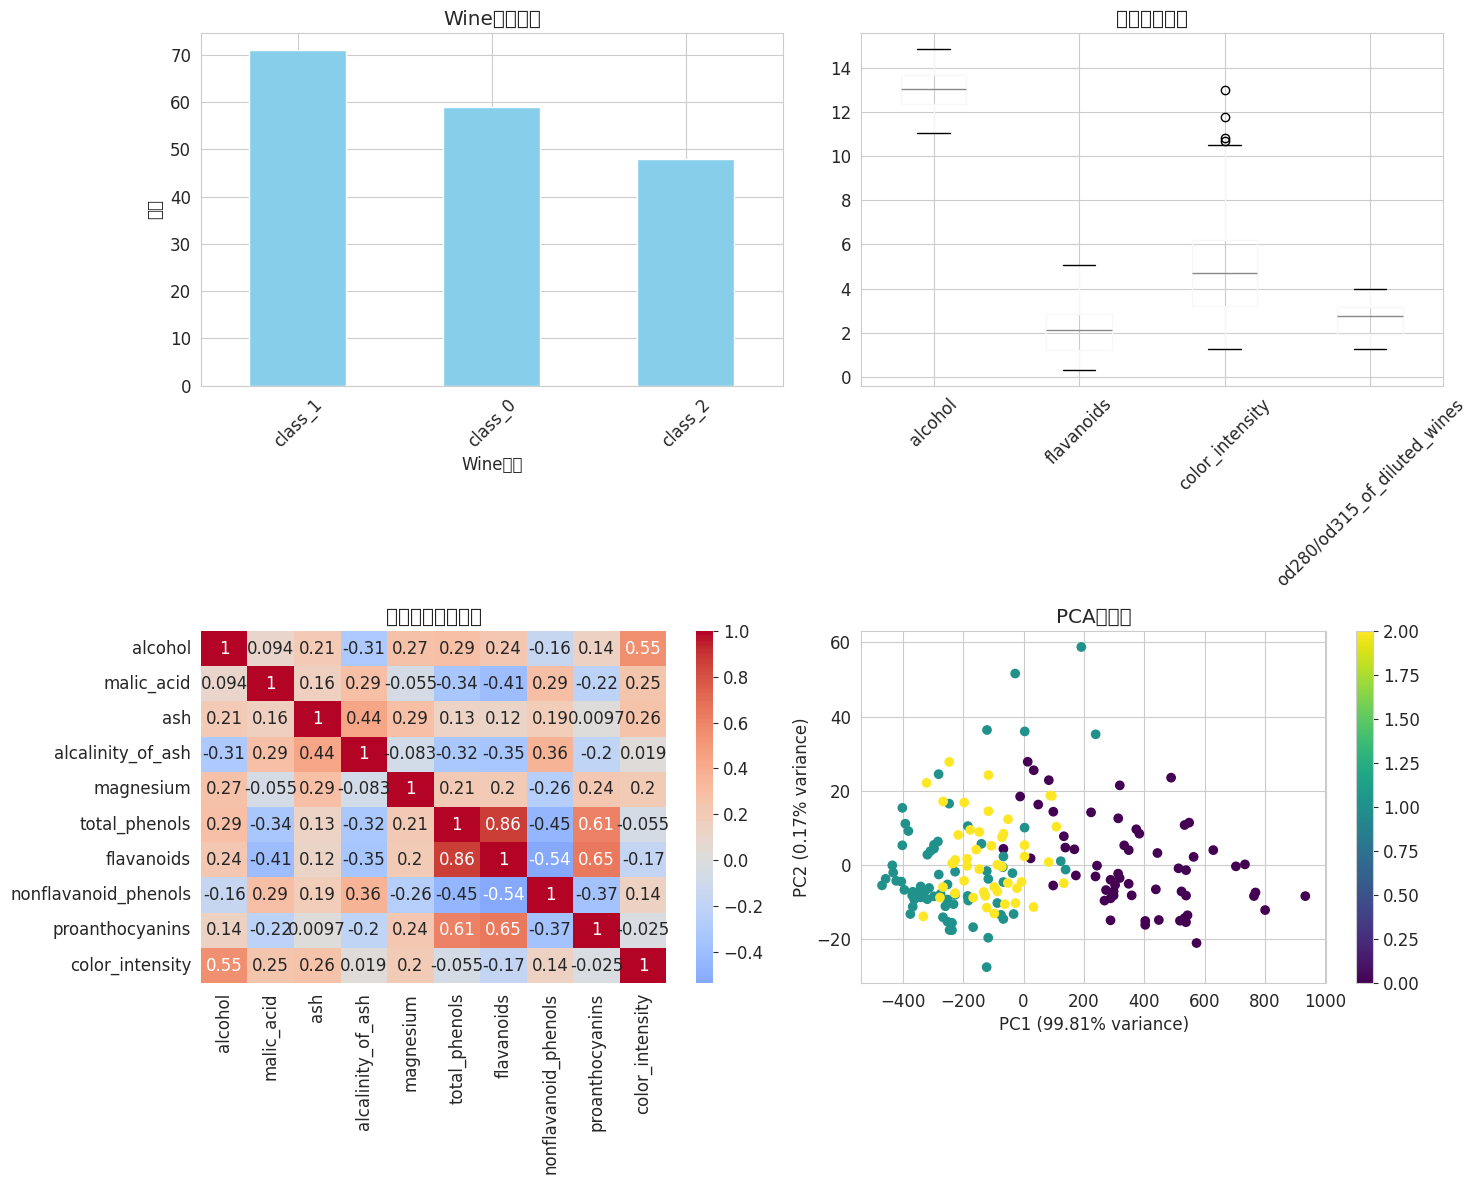


📊 PCA结果: PC1和PC2解释了 99.98% 的方差


In [ ]:
# 3.1 Wine数据集EDA
print("🍷 Wine数据集 - 探索性数据分析")
print("=" * 50)

# 目标变量分布
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 类别分布
wine_df['target_name'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Wine类别分布')
axes[0,0].set_xlabel('Wine类别')
axes[0,0].set_ylabel('数量')
axes[0,0].tick_params(axis='x', rotation=45)

# 特征分布箱线图
important_features = ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines']
wine_df[important_features].boxplot(ax=axes[0,1])
axes[0,1].set_title('重要特征分布')
axes[0,1].tick_params(axis='x', rotation=45)

# 相关性热力图
correlation_matrix = wine_df[wine_numeric_cols[:10]].corr()  # 选择前10个特征避免图表过于复杂
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,0])
axes[1,0].set_title('特征相关性热力图')

# 主成分散点图
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_df[wine_numeric_cols])
scatter = axes[1,1].scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine_df['target'], cmap='viridis')
axes[1,1].set_title('PCA可视化')
axes[1,1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1,1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter, ax=axes[1,1])

plt.tight_layout()
plt.show()

print(f"\n📊 PCA结果: PC1和PC2解释了 {sum(pca.explained_variance_ratio_):.2%} 的方差")

🏠 Housing数据集 - 探索性数据分析


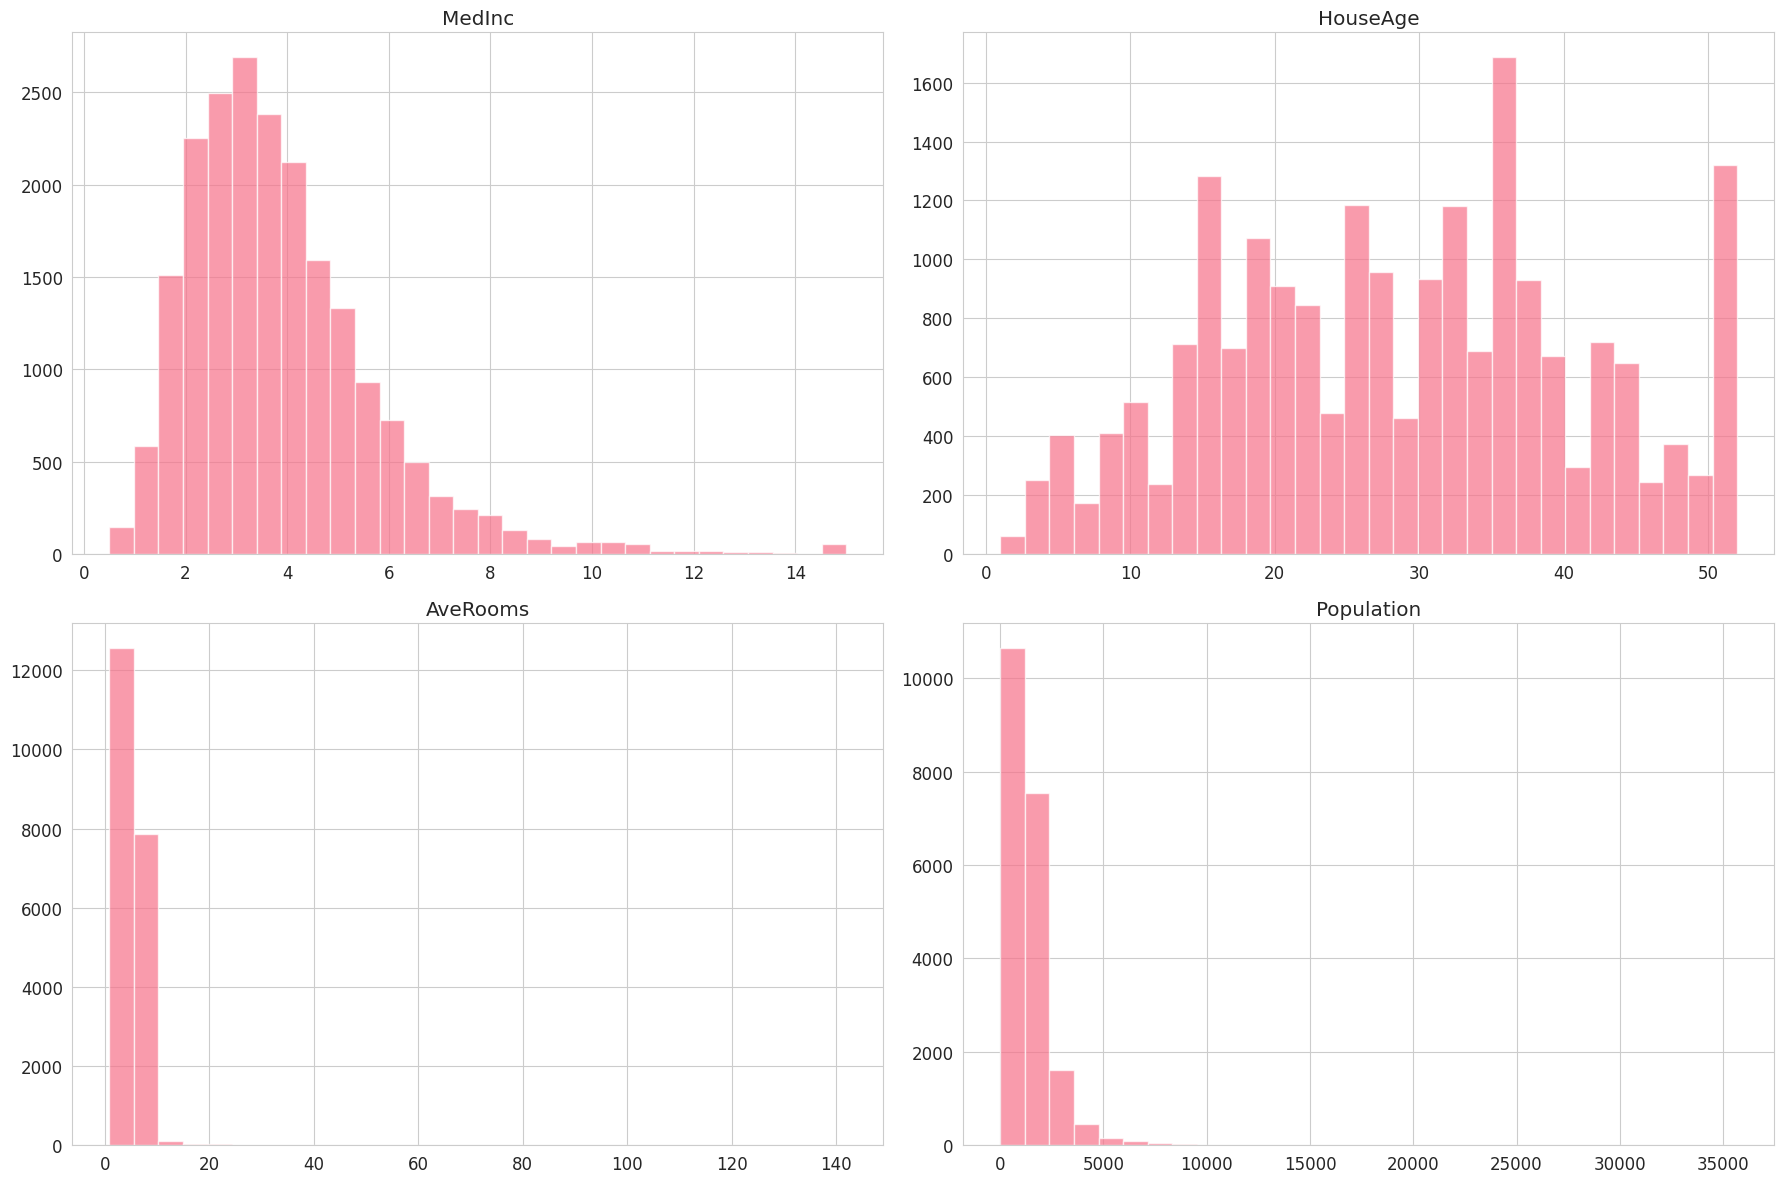


📊 特征与房价的相关性 (按绝对值排序):
target        1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
Name: target, dtype: float64


In [ ]:
# 3.2 Housing数据集EDA
print("🏠 Housing数据集 - 探索性数据分析")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 目标变量分布
axes[0,0].hist(housing_df['target'], bins=50, alpha=0.7, color='lightblue')
axes[0,0].set_title('房价分布')
axes[0,0].set_xlabel('房价 (十万美元)')
axes[0,0].set_ylabel('频次')

# 地理分布
scatter = axes[0,1].scatter(housing_df['Longitude'], housing_df['Latitude'],
                           c=housing_df['target'], cmap='viridis', alpha=0.6, s=10)
axes[0,1].set_title('房价地理分布')
axes[0,1].set_xlabel('经度')
axes[0,1].set_ylabel('纬度')
plt.colorbar(scatter, ax=axes[0,1])

# 收入vs房价
axes[0,2].scatter(housing_df['MedInc'], housing_df['target'], alpha=0.6)
axes[0,2].set_title('收入 vs 房价')
axes[0,2].set_xlabel('家庭收入中位数')
axes[0,2].set_ylabel('房价')

# 房屋年龄vs房价
axes[1,0].scatter(housing_df['HouseAge'], housing_df['target'], alpha=0.6)
axes[1,0].set_title('房屋年龄 vs 房价')
axes[1,0].set_xlabel('房屋年龄')
axes[1,0].set_ylabel('房价')

# 相关性热力图
correlation_matrix_housing = housing_df.corr()
sns.heatmap(correlation_matrix_housing, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('特征相关性热力图')

# 特征分布
housing_df[['MedInc', 'HouseAge', 'AveRooms', 'Population']].hist(ax=axes[1,2], bins=30, alpha=0.7)
axes[1,2].set_title('主要特征分布')

plt.tight_layout()
plt.show()

# 特征与目标的相关性分析
print("\n📊 特征与房价的相关性 (按绝对值排序):")
correlation_with_target = housing_df.corr()['target'].abs().sort_values(ascending=False)
print(correlation_with_target[:-1])  # 排除target本身

---

# 4. 特征工程与数据预处理

In [ ]:
# 4.1 特征工程
print("🔧 特征工程")
print("=" * 50)

# Wine数据集特征工程
print("\n🍷 Wine数据集特征工程:")
wine_features = wine_df.drop(['target', 'target_name'], axis=1).copy()
wine_target = wine_df['target'].copy()

# 创建交互特征
wine_features['alcohol_flavanoids'] = wine_features['alcohol'] * wine_features['flavanoids']
wine_features['color_od280_ratio'] = wine_features['color_intensity'] / (wine_features['od280/od315_of_diluted_wines'] + 1e-8)

print(f"原始特征数: {len(wine_data.feature_names)}")
print(f"工程后特征数: {wine_features.shape[1]}")
print("新增特征: alcohol_flavanoids, color_od280_ratio")

# Housing数据集特征工程
print("\n🏠 Housing数据集特征工程:")
housing_features = housing_df.drop(['target'], axis=1).copy()
housing_target = housing_df['target'].copy()

# 创建有意义的交互特征
housing_features['rooms_per_person'] = housing_features['AveRooms'] / housing_features['AveOccup']
housing_features['bedrooms_per_room'] = housing_features['AveBedrms'] / housing_features['AveRooms']
housing_features['population_density'] = housing_features['Population'] / housing_features['AveOccup']
housing_features['income_per_age'] = housing_features['MedInc'] / (housing_features['HouseAge'] + 1)

# 处理可能的无穷值
housing_features = housing_features.replace([np.inf, -np.inf], np.nan)
housing_features = housing_features.fillna(housing_features.median())

print(f"原始特征数: {len(housing_data.feature_names)}")
print(f"工程后特征数: {housing_features.shape[1]}")
print("新增特征: rooms_per_person, bedrooms_per_room, population_density, income_per_age")

print("\n✅ 特征工程完成!")

🔧 特征工程

🍷 Wine数据集特征工程:
原始特征数: 13
工程后特征数: 15
新增特征: alcohol_flavanoids, color_od280_ratio

🏠 Housing数据集特征工程:
原始特征数: 8
工程后特征数: 12
新增特征: rooms_per_person, bedrooms_per_room, population_density, income_per_age

✅ 特征工程完成!


In [ ]:
# 4.2 数据集划分
print("📊 数据集划分")
print("=" * 50)

# Wine数据集划分
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    wine_features, wine_target, test_size=0.2, random_state=42, stratify=wine_target
)

print(f"🍷 Wine数据集划分:")
print(f"  训练集: {X_wine_train.shape[0]} 样本")
print(f"  测试集: {X_wine_test.shape[0]} 样本")
print(f"  特征数: {X_wine_train.shape[1]}")
print(f"  类别分布 - 训练集: {np.bincount(y_wine_train)}")
print(f"  类别分布 - 测试集: {np.bincount(y_wine_test)}")

# Housing数据集划分
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(
    housing_features, housing_target, test_size=0.2, random_state=42
)

print(f"\n🏠 Housing数据集划分:")
print(f"  训练集: {X_housing_train.shape[0]} 样本")
print(f"  测试集: {X_housing_test.shape[0]} 样本")
print(f"  特征数: {X_housing_train.shape[1]}")
print(f"  目标范围 - 训练集: [{y_housing_train.min():.2f}, {y_housing_train.max():.2f}]")
print(f"  目标范围 - 测试集: [{y_housing_test.min():.2f}, {y_housing_test.max():.2f}]")

print("\n✅ 数据集划分完成!")

📊 数据集划分
🍷 Wine数据集划分:
  训练集: 142 样本
  测试集: 36 样本
  特征数: 15
  类别分布 - 训练集: [47 57 38]
  类别分布 - 测试集: [12 14 10]

🏠 Housing数据集划分:
  训练集: 16512 样本
  测试集: 4128 样本
  特征数: 12
  目标范围 - 训练集: [0.15, 5.00]
  目标范围 - 测试集: [0.15, 5.00]

✅ 数据集划分完成!


In [ ]:
# 4.3 特征缩放
print("⚖️ 特征缩放")
print("=" * 50)

# Wine数据集标准化
wine_scaler = StandardScaler()
X_wine_train_scaled = wine_scaler.fit_transform(X_wine_train)
X_wine_test_scaled = wine_scaler.transform(X_wine_test)

print(f"🍷 Wine数据集标准化:")
print(f"  原始数据范围: [{X_wine_train.min().min():.2f}, {X_wine_train.max().max():.2f}]")
print(f"  标准化后范围: [{X_wine_train_scaled.min():.2f}, {X_wine_train_scaled.max():.2f}]")
print(f"  标准化后均值: {X_wine_train_scaled.mean():.6f}")
print(f"  标准化后标准差: {X_wine_train_scaled.std():.6f}")

# Housing数据集标准化
housing_scaler = StandardScaler()
X_housing_train_scaled = housing_scaler.fit_transform(X_housing_train)
X_housing_test_scaled = housing_scaler.transform(X_housing_test)

print(f"\n🏠 Housing数据集标准化:")
print(f"  原始数据范围: [{X_housing_train.min().min():.2f}, {X_housing_train.max().max():.2f}]")
print(f"  标准化后范围: [{X_housing_train_scaled.min():.2f}, {X_housing_train_scaled.max():.2f}]")
print(f"  标准化后均值: {X_housing_train_scaled.mean():.6f}")
print(f"  标准化后标准差: {X_housing_train_scaled.std():.6f}")

print("\n✅ 特征缩放完成!")

⚖️ 特征缩放
🍷 Wine数据集标准化:
  原始数据范围: [0.13, 1515.00]
  标准化后范围: [-3.76, 4.19]
  标准化后均值: -0.000000
  标准化后标准差: 1.000000

🏠 Housing数据集标准化:
  原始数据范围: [-124.35, 35682.00]
  标准化后范围: [-2.38, 107.12]
  标准化后均值: 0.000000
  标准化后标准差: 1.000000

✅ 特征缩放完成!


---

# 5. 降维技术

📉 主成分分析 (PCA)

🍷 Wine数据集PCA分析:
  原始特征数: 15
  达到95%方差需要: 10 个主成分
  达到99%方差需要: 13 个主成分
  前3个主成分解释的方差: 68.80%

🏠 Housing数据集PCA分析:
  原始特征数: 12
  达到95%方差需要: 7 个主成分
  前5个主成分解释的方差: 83.89%


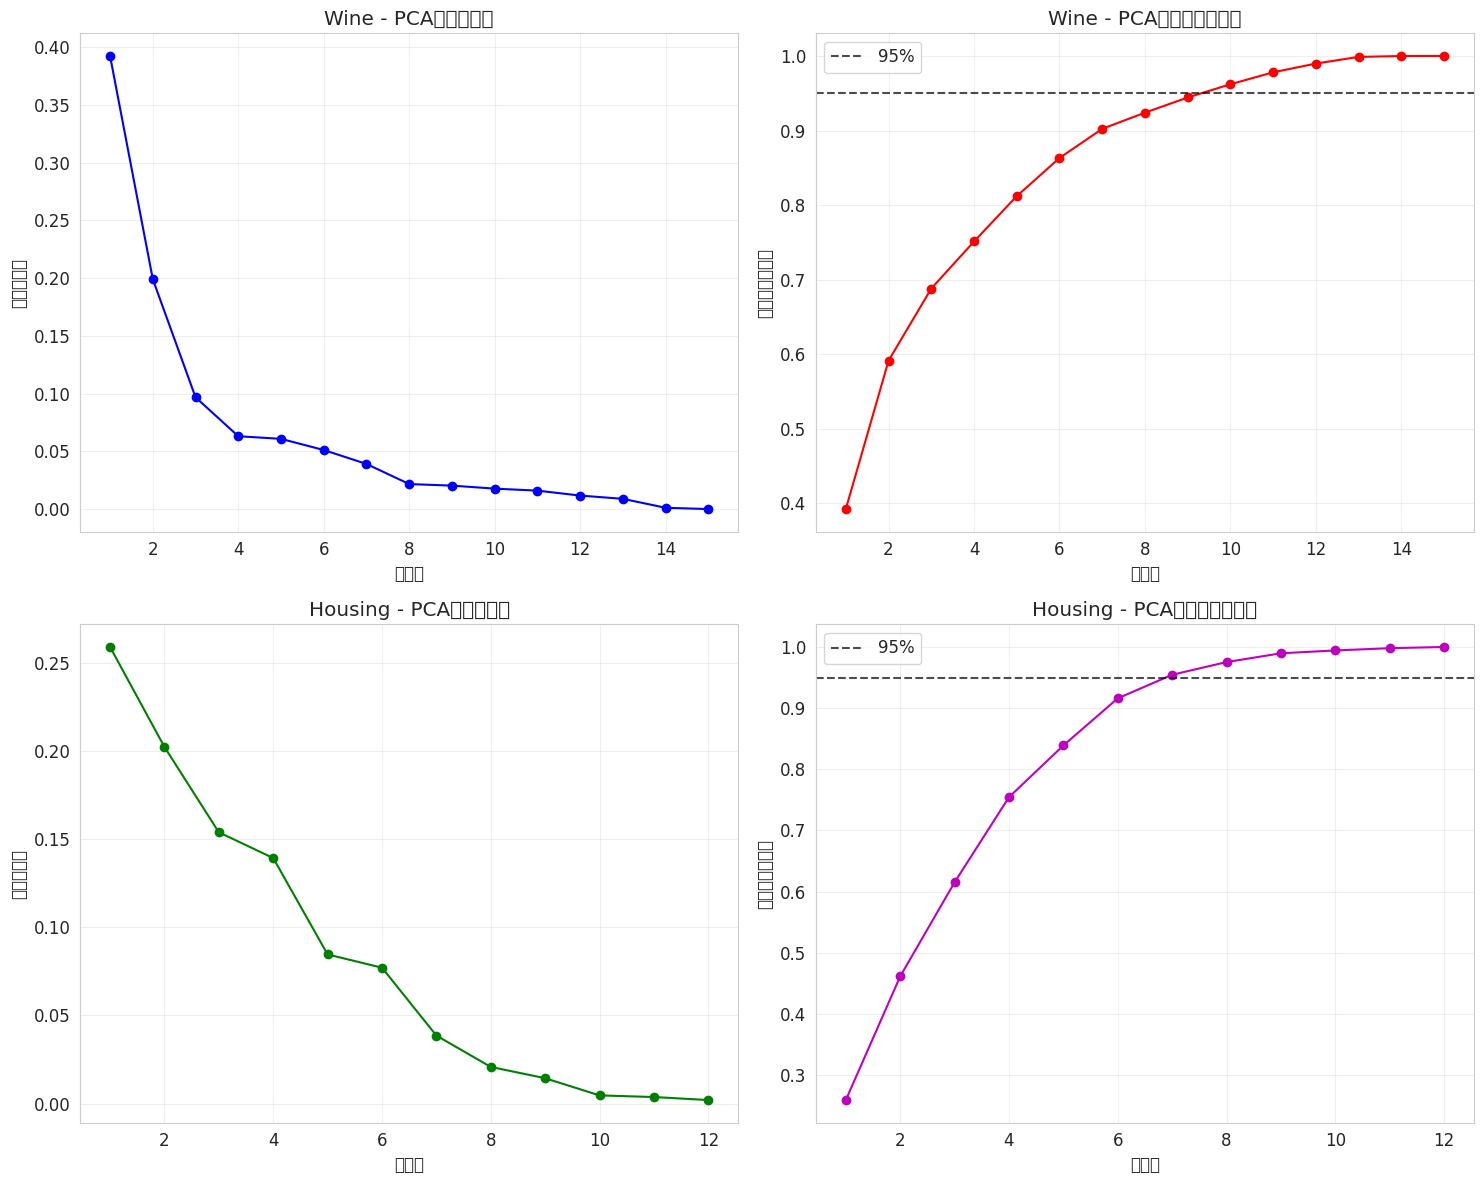


✅ PCA分析完成!


In [ ]:
# 5.1 PCA降维分析
print("📉 主成分分析 (PCA)")
print("=" * 50)

# Wine数据集PCA
print("\n🍷 Wine数据集PCA分析:")
wine_pca = PCA()
X_wine_pca = wine_pca.fit_transform(X_wine_train_scaled)

# 计算累计方差贡献率
cumulative_variance = np.cumsum(wine_pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"  原始特征数: {X_wine_train_scaled.shape[1]}")
print(f"  达到95%方差需要: {n_components_95} 个主成分")
print(f"  达到99%方差需要: {n_components_99} 个主成分")
print(f"  前3个主成分解释的方差: {cumulative_variance[2]:.2%}")

# Housing数据集PCA
print("\n🏠 Housing数据集PCA分析:")
housing_pca = PCA()
X_housing_pca = housing_pca.fit_transform(X_housing_train_scaled)

cumulative_variance_housing = np.cumsum(housing_pca.explained_variance_ratio_)
n_components_95_housing = np.argmax(cumulative_variance_housing >= 0.95) + 1

print(f"  原始特征数: {X_housing_train_scaled.shape[1]}")
print(f"  达到95%方差需要: {n_components_95_housing} 个主成分")
print(f"  前5个主成分解释的方差: {cumulative_variance_housing[4]:.2%}")

# 可视化PCA结果
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Wine PCA方差贡献率
axes[0,0].plot(range(1, len(wine_pca.explained_variance_ratio_) + 1),
               wine_pca.explained_variance_ratio_, 'bo-')
axes[0,0].set_title('Wine - PCA方差贡献率')
axes[0,0].set_xlabel('主成分')
axes[0,0].set_ylabel('方差贡献率')
axes[0,0].grid(True, alpha=0.3)

# Wine PCA累计方差贡献率
axes[0,1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
axes[0,1].axhline(y=0.95, color='k', linestyle='--', alpha=0.7, label='95%')
axes[0,1].set_title('Wine - PCA累计方差贡献率')
axes[0,1].set_xlabel('主成分')
axes[0,1].set_ylabel('累计方差贡献率')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Housing PCA方差贡献率
axes[1,0].plot(range(1, len(housing_pca.explained_variance_ratio_) + 1),
               housing_pca.explained_variance_ratio_, 'go-')
axes[1,0].set_title('Housing - PCA方差贡献率')
axes[1,0].set_xlabel('主成分')
axes[1,0].set_ylabel('方差贡献率')
axes[1,0].grid(True, alpha=0.3)

# Housing PCA累计方差贡献率
axes[1,1].plot(range(1, len(cumulative_variance_housing) + 1), cumulative_variance_housing, 'mo-')
axes[1,1].axhline(y=0.95, color='k', linestyle='--', alpha=0.7, label='95%')
axes[1,1].set_title('Housing - PCA累计方差贡献率')
axes[1,1].set_xlabel('主成分')
axes[1,1].set_ylabel('累计方差贡献率')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ PCA分析完成!")

In [ ]:
# 5.2 特征选择
print("🎯 特征选择")
print("=" * 50)

# Wine数据集特征选择
print("\n🍷 Wine数据集特征选择:")

# 基于F检验的特征选择
selector_wine = SelectKBest(score_func=f_classif, k=10)
X_wine_selected = selector_wine.fit_transform(X_wine_train_scaled, y_wine_train)

# 获取特征得分
feature_scores_wine = pd.DataFrame({
    'feature': wine_features.columns,
    'score': selector_wine.scores_,
    'selected': selector_wine.get_support()
}).sort_values('score', ascending=False)

print(f"  选择的特征数: {X_wine_selected.shape[1]}")
print("  Top 10 重要特征:")
print(feature_scores_wine.head(10)[['feature', 'score', 'selected']])

# Housing数据集特征选择
print("\n🏠 Housing数据集特征选择:")

selector_housing = SelectKBest(score_func=f_regression, k=8)
X_housing_selected = selector_housing.fit_transform(X_housing_train_scaled, y_housing_train)

feature_scores_housing = pd.DataFrame({
    'feature': housing_features.columns,
    'score': selector_housing.scores_,
    'selected': selector_housing.get_support()
}).sort_values('score', ascending=False)

print(f"  选择的特征数: {X_housing_selected.shape[1]}")
print("  Top 8 重要特征:")
print(feature_scores_housing.head(8)[['feature', 'score', 'selected']])

print("\n✅ 特征选择完成!")

🎯 特征选择

🍷 Wine数据集特征选择:
  选择的特征数: 10
  Top 10 重要特征:
                         feature       score  selected
13            alcohol_flavanoids  246.491316      True
6                     flavanoids  224.760551      True
14             color_od280_ratio  161.483174      True
12                       proline  161.459538      True
11  od280/od315_of_diluted_wines  144.758527      True
9                color_intensity  103.897340      True
0                        alcohol   98.468093      True
10                           hue   79.531558      True
5                  total_phenols   72.338568      True
1                     malic_acid   29.088066      True

🏠 Housing数据集特征选择:
  选择的特征数: 8
  Top 8 重要特征:
               feature         score  selected
0               MedInc  15057.439100      True
9    bedrooms_per_room   1171.665876      True
11      income_per_age   1084.299900      True
8     rooms_per_person    783.983788      True
2             AveRooms    425.373449      True
6             Lat

---

# 6. 分类模型训练与评估

## 🎯 所有分类模型训练

我们将使用Wine数据集训练多种分类算法，并对比它们的性能。

In [ ]:
# 6.1 定义所有分类模型
print("🤖 定义所有分类模型")
print("=" * 50)

# 创建分类模型字典
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

print(f"📊 定义了 {len(classification_models)} 个分类模型:")
for i, (name, model) in enumerate(classification_models.items(), 1):
    print(f"  {i:2d}. {name}")

print("\n✅ 分类模型定义完成!")

# 准备存储结果的字典
classification_results = {}
classification_training_times = {}

print("\n⏱️  开始训练分类模型...")
print("=" * 50)

🤖 定义所有分类模型
📊 定义了 11 个分类模型:
   1. Logistic Regression
   2. Decision Tree
   3. Random Forest
   4. Gradient Boosting
   5. SVM (RBF)
   6. SVM (Linear)
   7. K-Nearest Neighbors
   8. Naive Bayes
   9. Neural Network
  10. AdaBoost
  11. Extra Trees

✅ 分类模型定义完成!

⏱️  开始训练分类模型...


In [ ]:
# 6.2 训练和评估所有分类模型
import time

for name, model in classification_models.items():
    print(f"\n🔄 训练 {name}...")

    # 记录训练时间
    start_time = time.time()

    try:
        # 训练模型
        model.fit(X_wine_train_scaled, y_wine_train)

        # 预测
        y_train_pred = model.predict(X_wine_train_scaled)
        y_test_pred = model.predict(X_wine_test_scaled)

        # 计算评估指标
        train_accuracy = accuracy_score(y_wine_train, y_train_pred)
        test_accuracy = accuracy_score(y_wine_test, y_test_pred)

        precision = precision_score(y_wine_test, y_test_pred, average='weighted')
        recall = recall_score(y_wine_test, y_test_pred, average='weighted')
        f1 = f1_score(y_wine_test, y_test_pred, average='weighted')

        # 计算交叉验证分数
        cv_scores = cross_val_score(model, X_wine_train_scaled, y_wine_train, cv=5)

        # ROC-AUC (多分类)
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_wine_test_scaled)
            try:
                roc_auc = roc_auc_score(y_wine_test, y_proba, multi_class='ovr')
            except:
                roc_auc = None
        else:
            roc_auc = None

        # 记录训练时间
        training_time = time.time() - start_time

        # 存储结果
        classification_results[name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'roc_auc': roc_auc,
            'training_time': training_time,
            'model': model,
            'y_pred': y_test_pred,
            'y_proba': y_proba if hasattr(model, 'predict_proba') else None
        }

        print(f"   ✅ 完成 - 测试准确率: {test_accuracy:.4f}, CV: {cv_scores.mean():.4f}(±{cv_scores.std():.4f})")

    except Exception as e:
        print(f"   ❌ 训练失败: {str(e)}")
        continue

print(f"\n🎉 所有分类模型训练完成!")
print(f"成功训练的模型数量: {len(classification_results)}")

# 创建结果DataFrame
classification_df = pd.DataFrame.from_dict(classification_results, orient='index')
classification_df = classification_df.drop(['model', 'y_pred', 'y_proba'], axis=1)  # 移除不能显示的列

print("\n📊 分类模型性能总结:")
print("=" * 80)
display(classification_df.round(4))


🔄 训练 Logistic Regression...
   ✅ 完成 - 测试准确率: 1.0000, CV: 1.0000(±0.0000)

🔄 训练 Decision Tree...
   ✅ 完成 - 测试准确率: 0.9722, CV: 0.9229(±0.0461)

🔄 训练 Random Forest...
   ✅ 完成 - 测试准确率: 1.0000, CV: 0.9722(±0.0259)

🔄 训练 Gradient Boosting...
   ✅ 完成 - 测试准确率: 0.9722, CV: 0.9372(±0.0593)

🔄 训练 SVM (RBF)...
   ✅ 完成 - 测试准确率: 0.9722, CV: 0.9862(±0.0276)

🔄 训练 SVM (Linear)...
   ✅ 完成 - 测试准确率: 0.9444, CV: 0.9791(±0.0277)

🔄 训练 K-Nearest Neighbors...
   ✅ 完成 - 测试准确率: 1.0000, CV: 0.9579(±0.0263)

🔄 训练 Naive Bayes...
   ✅ 完成 - 测试准确率: 0.9444, CV: 0.9648(±0.0314)

🔄 训练 Neural Network...
   ✅ 完成 - 测试准确率: 0.9722, CV: 0.9931(±0.0138)

🔄 训练 AdaBoost...
   ✅ 完成 - 测试准确率: 1.0000, CV: 0.9367(±0.0472)

🔄 训练 Extra Trees...
   ✅ 完成 - 测试准确率: 1.0000, CV: 0.9724(±0.0338)

🎉 所有分类模型训练完成!
成功训练的模型数量: 11

📊 分类模型性能总结:


,train_accuracy,test_accuracy,precision,recall,f1_score,cv_mean,cv_std,roc_auc,training_time
Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.1403
Decision Tree,1.0000,0.9722,0.9741,0.9722,0.9721,0.9229,0.0461,0.9785,0.1129
Random Forest,1.0000,1.0000,1.0000,1.0000,1.0000,0.9722,0.0259,1.0000,1.6478
Gradient Boosting,1.0000,0.9722,0.9744,0.9722,0.9723,0.9372,0.0593,0.9978,3.5614
SVM (RBF),1.0000,0.9722,0.9741,0.9722,0.9720,0.9862,0.0276,1.0000,0.0473
SVM (Linear),1.0000,0.9444,0.9466,0.9444,0.9443,0.9791,0.0277,0.9956,0.0358
K-Nearest Neighbors,0.9859,1.0000,1.0000,1.0000,1.0000,0.9579,0.0263,1.0000,0.0347
Naive Bayes,0.9789,0.9444,0.9524,0.9444,0.9444,0.9648,0.0314,1.0000,0.0307
Neural Network,1.0000,0.9722,0.9741,0.9722,0.9720,0.9931,0.0138,1.0000,1.1636
AdaBoost,1.0000,1.0000,1.0000,1.0000,1.0000,0.9367,0.0472,1.0000,1.5867


---

# 7. 回归模型训练与评估

## 🏠 所有回归模型训练

我们将使用California Housing数据集训练多种回归算法。

In [ ]:
# 7.1 定义所有回归模型
print("🏠 定义所有回归模型")
print("=" * 50)

# 创建回归模型字典
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42)
}

print(f"📊 定义了 {len(regression_models)} 个回归模型:")
for i, (name, model) in enumerate(regression_models.items(), 1):
    print(f"  {i:2d}. {name}")

print("\n✅ 回归模型定义完成!")

# 准备存储结果的字典
regression_results = {}

print("\n⏱️  开始训练回归模型...")
print("=" * 50)

🏠 定义所有回归模型
📊 定义了 11 个回归模型:
   1. Linear Regression
   2. Ridge Regression
   3. Lasso Regression
   4. Elastic Net
   5. Decision Tree
   6. Random Forest
   7. Gradient Boosting
   8. Support Vector Regressor
   9. K-Nearest Neighbors
  10. Neural Network
  11. Extra Trees

✅ 回归模型定义完成!

⏱️  开始训练回归模型...


In [ ]:
# 7.2 训练和评估所有回归模型

for name, model in regression_models.items():
    print(f"\n🔄 训练 {name}...")

    # 记录训练时间
    start_time = time.time()

    try:
        # 训练模型
        model.fit(X_housing_train_scaled, y_housing_train)

        # 预测
        y_train_pred = model.predict(X_housing_train_scaled)
        y_test_pred = model.predict(X_housing_test_scaled)

        # 计算评估指标
        train_r2 = r2_score(y_housing_train, y_train_pred)
        test_r2 = r2_score(y_housing_test, y_test_pred)

        mae = mean_absolute_error(y_housing_test, y_test_pred)
        mse = mean_squared_error(y_housing_test, y_test_pred)
        rmse = np.sqrt(mse)

        # 计算交叉验证分数 (使用负MSE)
        cv_scores = cross_val_score(model, X_housing_train_scaled, y_housing_train,
                                   cv=5, scoring='neg_mean_squared_error')
        cv_rmse_scores = np.sqrt(-cv_scores)

        # 记录训练时间
        training_time = time.time() - start_time

        # 存储结果
        regression_results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'cv_rmse_mean': cv_rmse_scores.mean(),
            'cv_rmse_std': cv_rmse_scores.std(),
            'training_time': training_time,
            'model': model,
            'y_pred': y_test_pred
        }

        print(f"   ✅ 完成 - R²: {test_r2:.4f}, RMSE: {rmse:.4f}, CV RMSE: {cv_rmse_scores.mean():.4f}(±{cv_rmse_scores.std():.4f})")

    except Exception as e:
        print(f"   ❌ 训练失败: {str(e)}")
        continue

print(f"\n🎉 所有回归模型训练完成!")
print(f"成功训练的模型数量: {len(regression_results)}")

# 创建结果DataFrame
regression_df = pd.DataFrame.from_dict(regression_results, orient='index')
regression_df = regression_df.drop(['model', 'y_pred'], axis=1)  # 移除不能显示的列

print("\n📊 回归模型性能总结:")
print("=" * 80)
display(regression_df.round(4))


🔄 训练 Linear Regression...
   ✅ 完成 - R²: 0.6536, RMSE: 0.6737, CV RMSE: 0.6745(±0.0230)

🔄 训练 Ridge Regression...
   ✅ 完成 - R²: 0.6536, RMSE: 0.6737, CV RMSE: 0.6745(±0.0230)

🔄 训练 Lasso Regression...
   ✅ 完成 - R²: 0.4907, RMSE: 0.8169, CV RMSE: 0.8120(±0.0086)

🔄 训练 Elastic Net...
   ✅ 完成 - R²: 0.5458, RMSE: 0.7714, CV RMSE: 0.7640(±0.0090)

🔄 训练 Decision Tree...
   ✅ 完成 - R²: 0.6178, RMSE: 0.7077, CV RMSE: 0.7396(±0.0166)

🔄 训练 Random Forest...
   ✅ 完成 - R²: 0.8026, RMSE: 0.5086, CV RMSE: 0.5138(±0.0033)

🔄 训练 Gradient Boosting...
   ✅ 完成 - R²: 0.7802, RMSE: 0.5366, CV RMSE: 0.5311(±0.0085)

🔄 训练 Support Vector Regressor...
   ✅ 完成 - R²: 0.7511, RMSE: 0.5711, CV RMSE: 0.5661(±0.0141)

🔄 训练 K-Nearest Neighbors...
   ✅ 完成 - R²: 0.7135, RMSE: 0.6127, CV RMSE: 0.6126(±0.0073)

🔄 训练 Neural Network...
   ✅ 完成 - R²: 0.7938, RMSE: 0.5198, CV RMSE: 0.5349(±0.0247)

🔄 训练 Extra Trees...
   ✅ 完成 - R²: 0.7947, RMSE: 0.5187, CV RMSE: 0.5230(±0.0061)

🎉 所有回归模型训练完成!
成功训练的模型数量: 11

📊 回归模型性能总结:


,train_r2,test_r2,mae,mse,rmse,cv_rmse_mean,cv_rmse_std,training_time
Linear Regression,0.6649,0.6536,0.4871,0.4539,0.6737,0.6745,0.0230,0.0547
Ridge Regression,0.6649,0.6536,0.4871,0.4539,0.6737,0.6745,0.0230,0.0387
Lasso Regression,0.5070,0.4907,0.6152,0.6674,0.8169,0.8120,0.0086,0.1003
Elastic Net,0.5636,0.5458,0.5730,0.5951,0.7714,0.7640,0.0090,0.1490
Decision Tree,1.0000,0.6178,0.4570,0.5008,0.7077,0.7396,0.0166,2.3336
Random Forest,0.9731,0.8026,0.3319,0.2586,0.5086,0.5138,0.0033,161.5968
Gradient Boosting,0.8106,0.7802,0.3662,0.2880,0.5366,0.5311,0.0085,58.3623
Support Vector Regressor,0.7760,0.7511,0.3831,0.3262,0.5711,0.5661,0.0141,86.7944
K-Nearest Neighbors,0.8177,0.7135,0.4135,0.3754,0.6127,0.6126,0.0073,4.9411
Neural Network,0.8452,0.7938,0.3528,0.2702,0.5198,0.5349,0.0247,129.3346


---

# 8. 训练过程可视化与学习曲线

## 📈 学习曲线分析

让我们分析一些关键模型的学习曲线，了解它们的训练过程。

📈 分类模型学习曲线分析


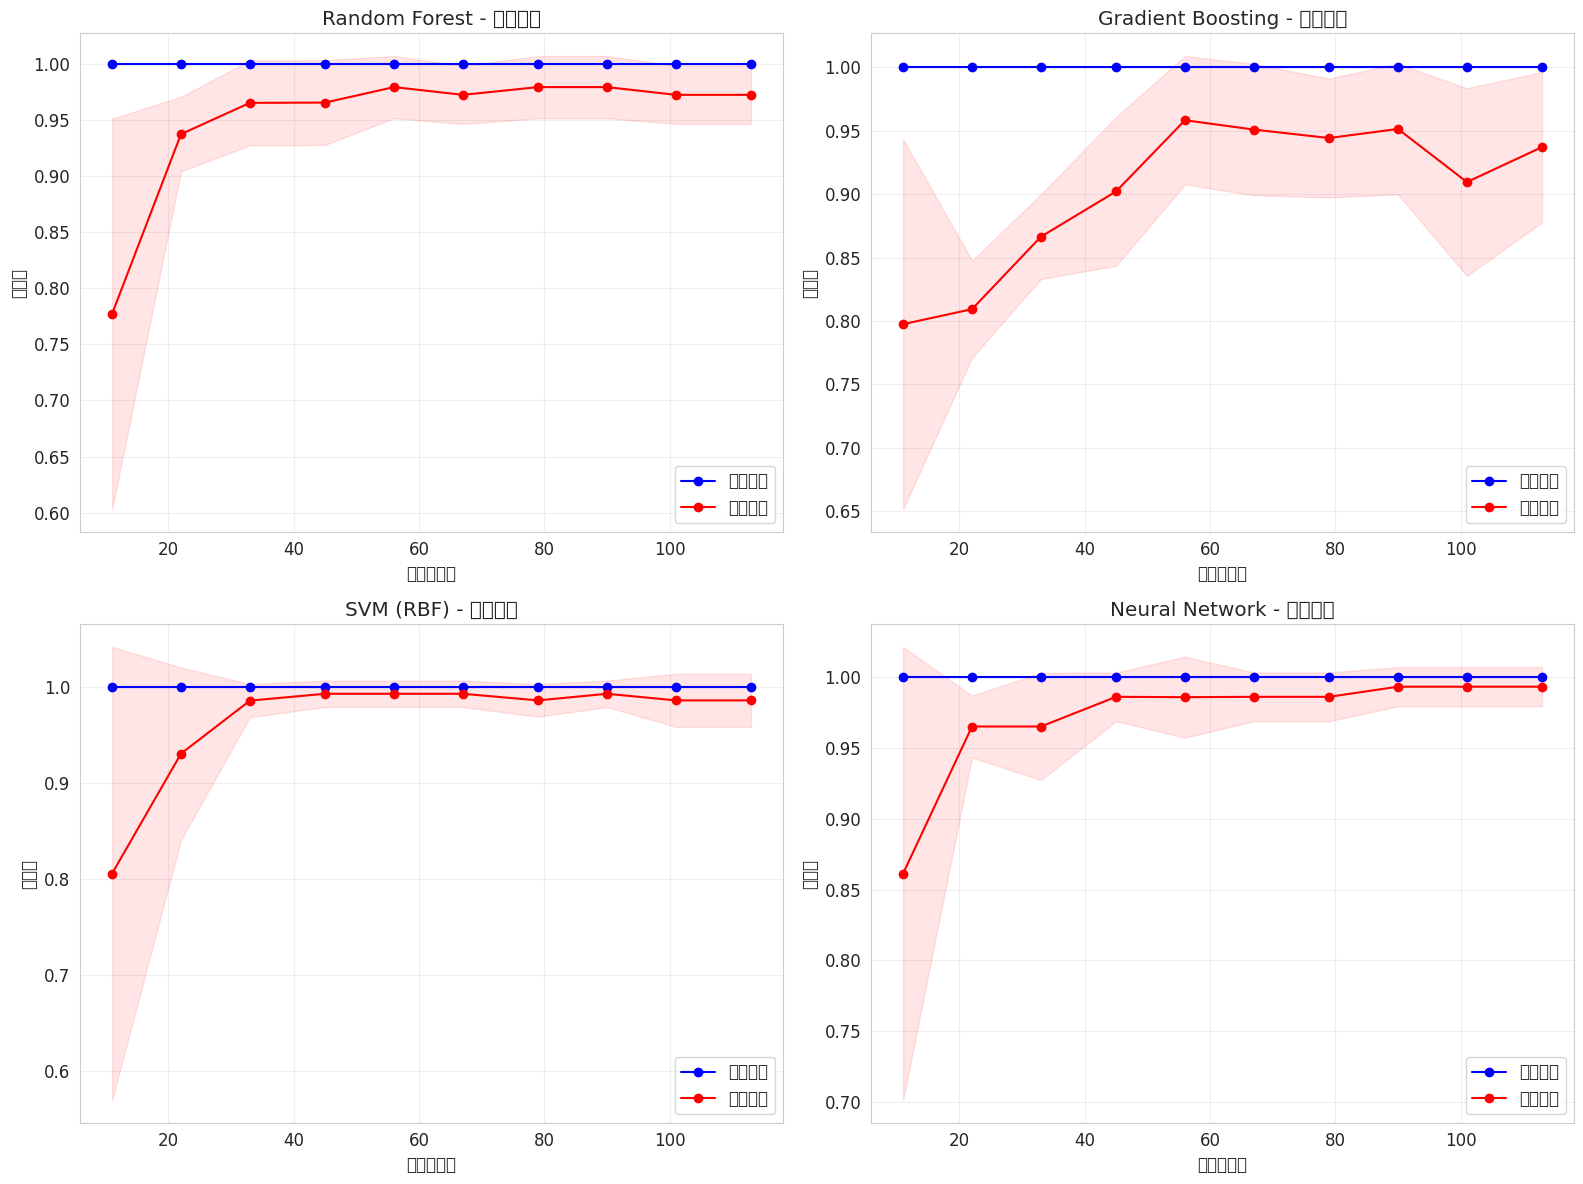

In [ ]:
# 8.1 分类模型学习曲线
print("📈 分类模型学习曲线分析")
print("=" * 50)

# 选择几个代表性的分类模型绘制学习曲线
selected_classification_models = ['Random Forest', 'Gradient Boosting', 'SVM (RBF)', 'Neural Network']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, model_name in enumerate(selected_classification_models):
    if model_name in classification_results:
        model = classification_results[model_name]['model']

        # 计算学习曲线
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_wine_train_scaled, y_wine_train, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        axes[i].plot(train_sizes, train_mean, 'o-', color='blue', label='训练得分')
        axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

        axes[i].plot(train_sizes, val_mean, 'o-', color='red', label='验证得分')
        axes[i].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

        axes[i].set_title(f'{model_name} - 学习曲线')
        axes[i].set_xlabel('训练样本数')
        axes[i].set_ylabel('准确率')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


📈 回归模型学习曲线分析


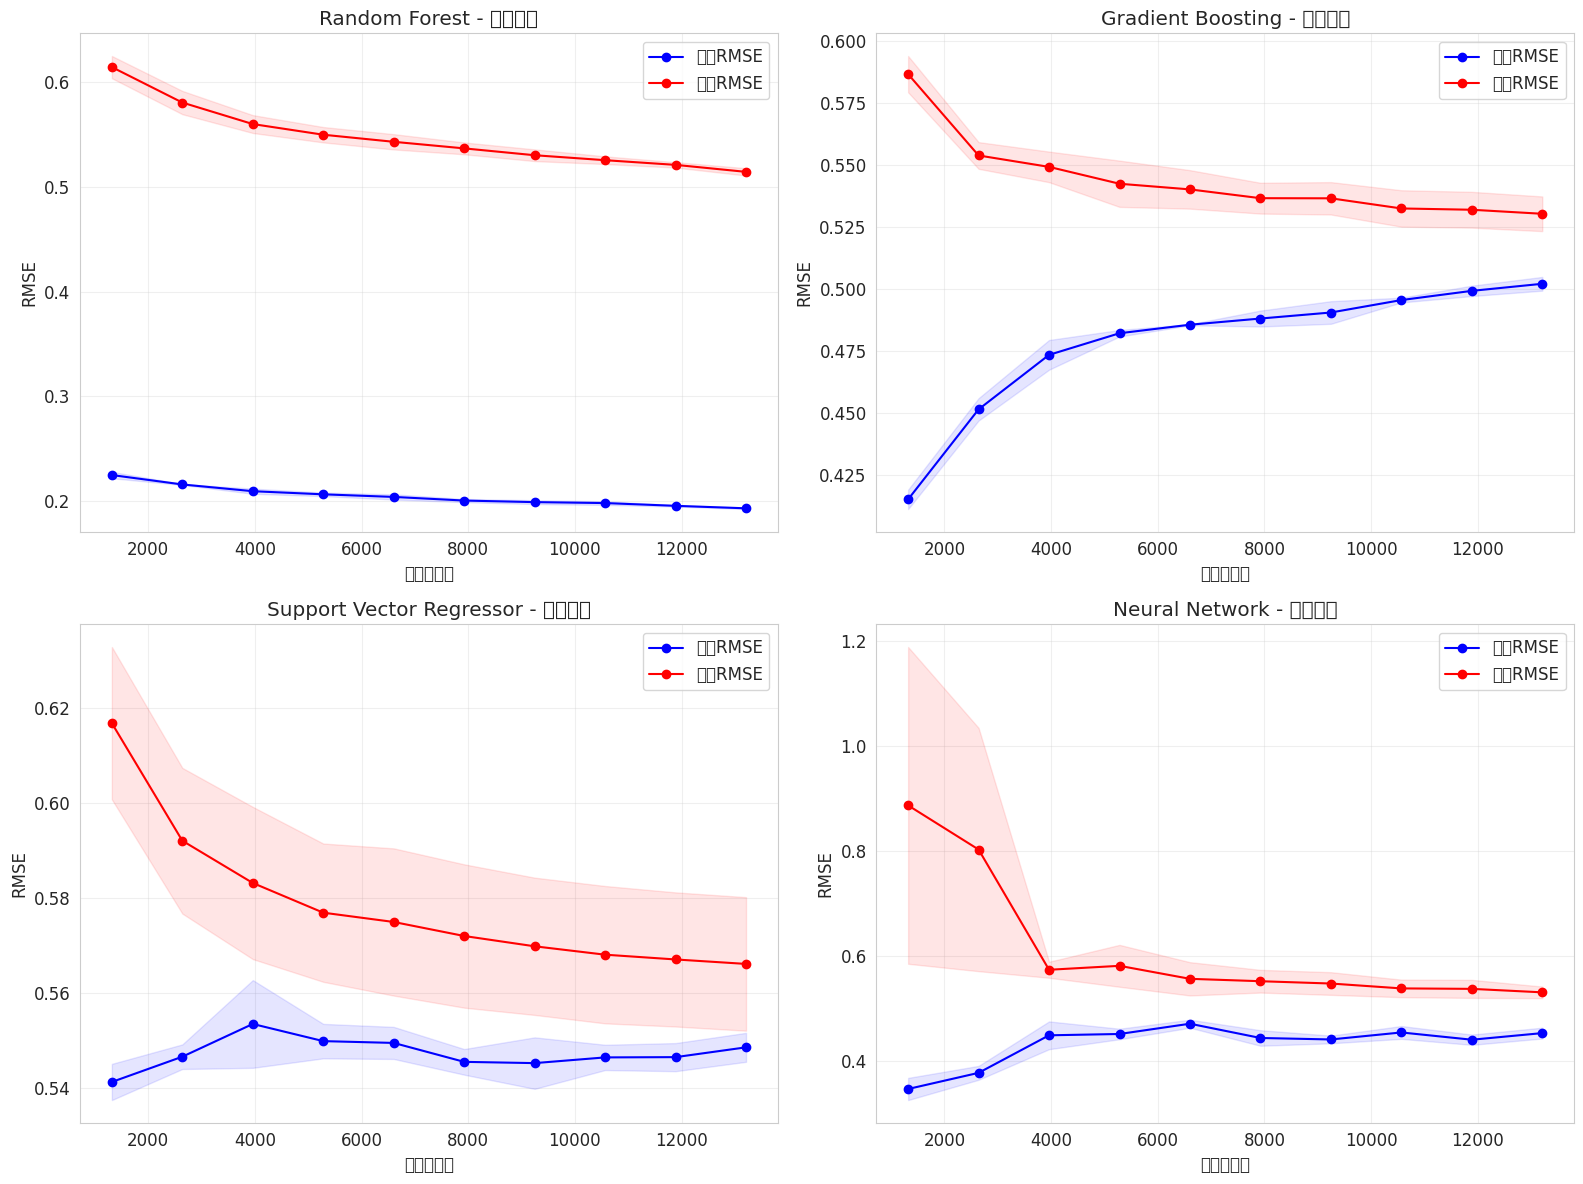

In [ ]:
# 8.2 回归模型学习曲线
print("\n📈 回归模型学习曲线分析")
print("=" * 50)

# 选择几个代表性的回归模型绘制学习曲线
selected_regression_models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'Neural Network']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, model_name in enumerate(selected_regression_models):
    if model_name in regression_results:
        model = regression_results[model_name]['model']

        # 计算学习曲线
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_housing_train_scaled, y_housing_train, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
        )

        # 转换为RMSE
        train_rmse = np.sqrt(-train_scores)
        val_rmse = np.sqrt(-val_scores)

        train_mean = np.mean(train_rmse, axis=1)
        train_std = np.std(train_rmse, axis=1)
        val_mean = np.mean(val_rmse, axis=1)
        val_std = np.std(val_rmse, axis=1)

        axes[i].plot(train_sizes, train_mean, 'o-', color='blue', label='训练RMSE')
        axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

        axes[i].plot(train_sizes, val_mean, 'o-', color='red', label='验证RMSE')
        axes[i].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

        axes[i].set_title(f'{model_name} - 学习曲线')
        axes[i].set_xlabel('训练样本数')
        axes[i].set_ylabel('RMSE')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# 9. 模型对比与选择

## 🏆 最佳模型选择

基于训练结果，我们来选择最佳的分类和回归模型。

🎯 分类模型性能对比


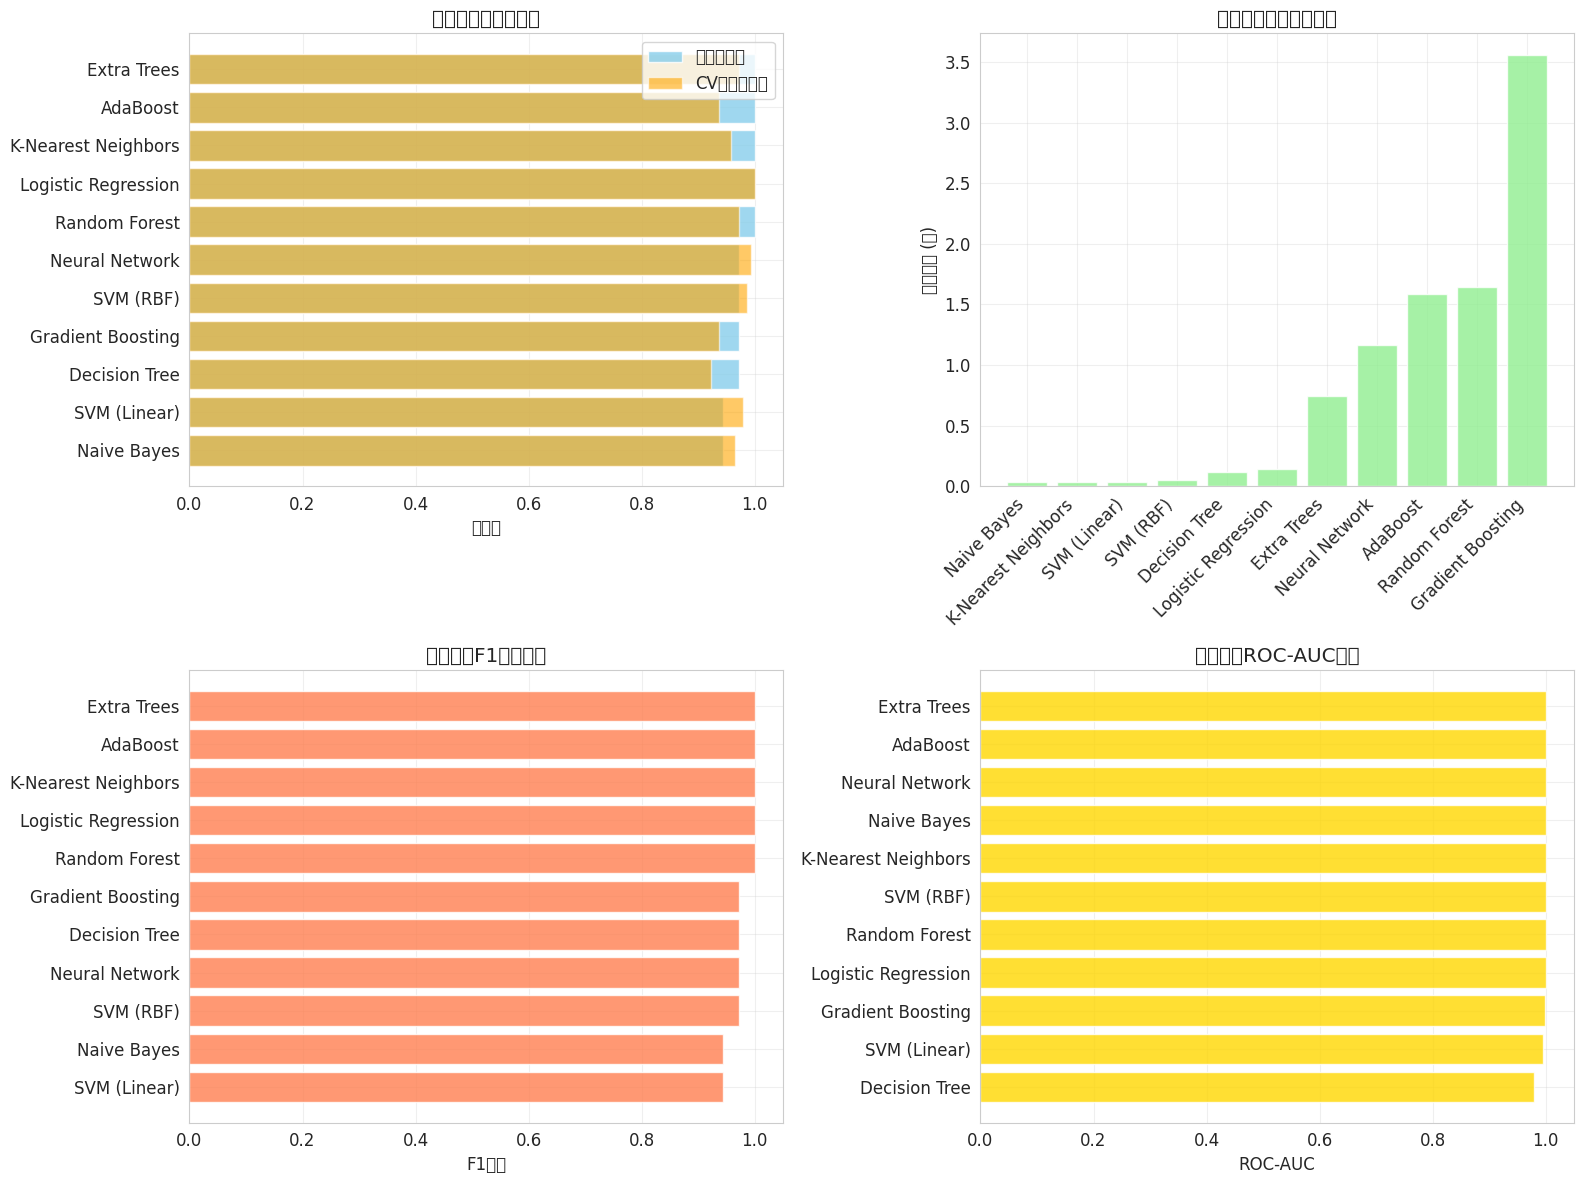


🏆 最佳分类模型 (测试准确率): Logistic Regression
   测试准确率: 1.0000
   F1分数: 1.0000

🏆 最佳分类模型 (交叉验证): Logistic Regression
   CV准确率: 1.0000 ± 0.0000

🥇 Top 3 分类模型 (按测试准确率):
  1. Logistic Regression: 准确率=1.0000, F1=1.0000, CV=1.0000
  2. Random Forest: 准确率=1.0000, F1=1.0000, CV=0.9722
  3. K-Nearest Neighbors: 准确率=1.0000, F1=1.0000, CV=0.9579


In [ ]:
# 9.1 分类模型对比可视化
print("🎯 分类模型性能对比")
print("=" * 50)

# 创建分类模型性能对比图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 准确率对比
classification_df_display = classification_df.copy()
accuracy_data = classification_df_display[['test_accuracy', 'cv_mean']].sort_values('test_accuracy', ascending=True)

axes[0,0].barh(range(len(accuracy_data)), accuracy_data['test_accuracy'], alpha=0.8, color='skyblue', label='测试准确率')
axes[0,0].barh(range(len(accuracy_data)), accuracy_data['cv_mean'], alpha=0.6, color='orange', label='CV平均准确率')
axes[0,0].set_yticks(range(len(accuracy_data)))
axes[0,0].set_yticklabels(accuracy_data.index)
axes[0,0].set_xlabel('准确率')
axes[0,0].set_title('分类模型准确率对比')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 训练时间对比
time_data = classification_df_display['training_time'].sort_values()
axes[0,1].bar(range(len(time_data)), time_data, color='lightgreen', alpha=0.8)
axes[0,1].set_xticks(range(len(time_data)))
axes[0,1].set_xticklabels(time_data.index, rotation=45, ha='right')
axes[0,1].set_ylabel('训练时间 (秒)')
axes[0,1].set_title('分类模型训练时间对比')
axes[0,1].grid(True, alpha=0.3)

# F1分数对比
f1_data = classification_df_display['f1_score'].sort_values(ascending=True)
axes[1,0].barh(range(len(f1_data)), f1_data, color='coral', alpha=0.8)
axes[1,0].set_yticks(range(len(f1_data)))
axes[1,0].set_yticklabels(f1_data.index)
axes[1,0].set_xlabel('F1分数')
axes[1,0].set_title('分类模型F1分数对比')
axes[1,0].grid(True, alpha=0.3)

# ROC-AUC对比 (排除没有概率预测的模型)
roc_data = classification_df_display.dropna(subset=['roc_auc'])['roc_auc'].sort_values(ascending=True)
if len(roc_data) > 0:
    axes[1,1].barh(range(len(roc_data)), roc_data, color='gold', alpha=0.8)
    axes[1,1].set_yticks(range(len(roc_data)))
    axes[1,1].set_yticklabels(roc_data.index)
    axes[1,1].set_xlabel('ROC-AUC')
    axes[1,1].set_title('分类模型ROC-AUC对比')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 找出最佳分类模型
best_classification_model = classification_df_display['test_accuracy'].idxmax()
best_cv_model = classification_df_display['cv_mean'].idxmax()

print(f"\n🏆 最佳分类模型 (测试准确率): {best_classification_model}")
print(f"   测试准确率: {classification_df_display.loc[best_classification_model, 'test_accuracy']:.4f}")
print(f"   F1分数: {classification_df_display.loc[best_classification_model, 'f1_score']:.4f}")

print(f"\n🏆 最佳分类模型 (交叉验证): {best_cv_model}")
print(f"   CV准确率: {classification_df_display.loc[best_cv_model, 'cv_mean']:.4f} ± {classification_df_display.loc[best_cv_model, 'cv_std']:.4f}")

# Top 3模型
print(f"\n🥇 Top 3 分类模型 (按测试准确率):")
top3_classification = classification_df_display.nlargest(3, 'test_accuracy')[['test_accuracy', 'f1_score', 'cv_mean']]
for i, (model, metrics) in enumerate(top3_classification.iterrows(), 1):
    print(f"  {i}. {model}: 准确率={metrics['test_accuracy']:.4f}, F1={metrics['f1_score']:.4f}, CV={metrics['cv_mean']:.4f}")


🏠 回归模型性能对比


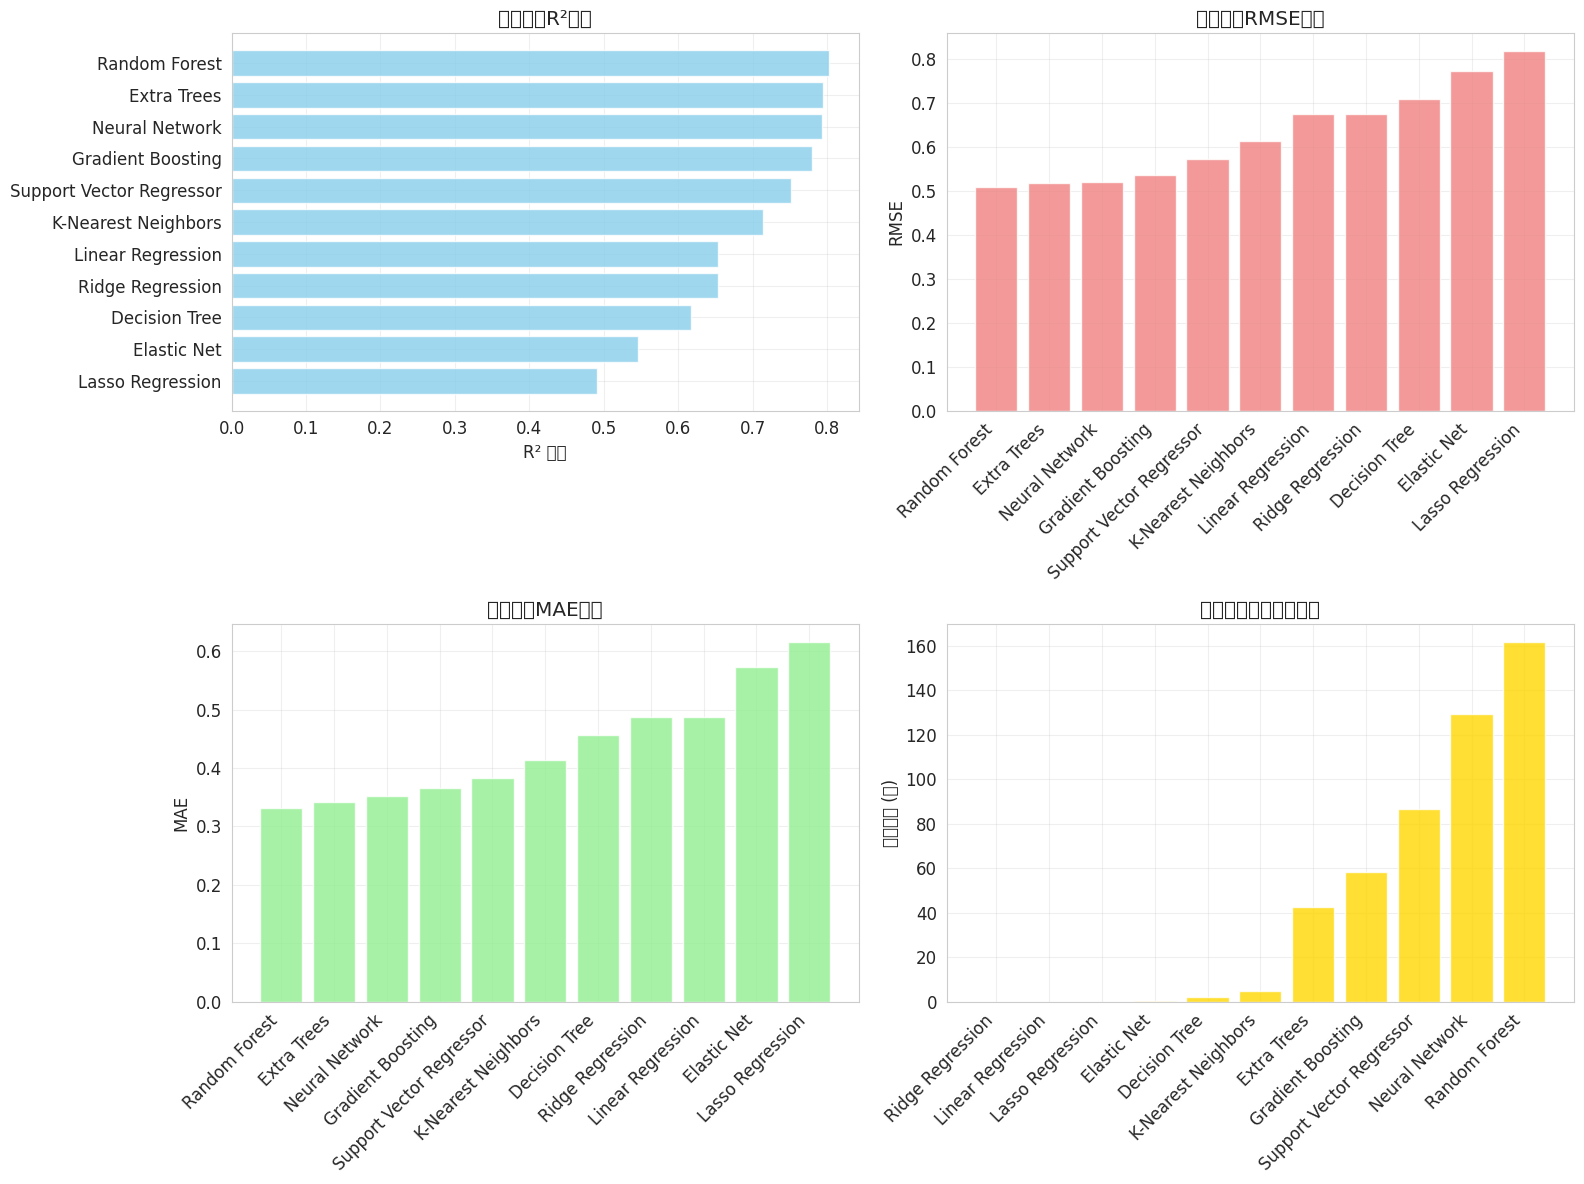


🏆 最佳回归模型 (R²): Random Forest
   R²分数: 0.8026
   RMSE: 0.5086

🏆 最佳回归模型 (RMSE): Random Forest
   RMSE: 0.5086
   R²分数: 0.8026

🥇 Top 3 回归模型 (按R²分数):
  1. Random Forest: R²=0.8026, RMSE=0.5086, MAE=0.3319
  2. Extra Trees: R²=0.7947, RMSE=0.5187, MAE=0.3423
  3. Neural Network: R²=0.7938, RMSE=0.5198, MAE=0.3528

🥇 Top 3 回归模型 (按RMSE):
  1. Random Forest: RMSE=0.5086, R²=0.8026, MAE=0.3319
  2. Extra Trees: RMSE=0.5187, R²=0.7947, MAE=0.3423
  3. Neural Network: RMSE=0.5198, R²=0.7938, MAE=0.3528


In [ ]:
# 9.2 回归模型对比可视化
print("\n🏠 回归模型性能对比")
print("=" * 50)

# 创建回归模型性能对比图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R²分数对比
regression_df_display = regression_df.copy()
r2_data = regression_df_display['test_r2'].sort_values(ascending=True)

axes[0,0].barh(range(len(r2_data)), r2_data, color='skyblue', alpha=0.8)
axes[0,0].set_yticks(range(len(r2_data)))
axes[0,0].set_yticklabels(r2_data.index)
axes[0,0].set_xlabel('R² 分数')
axes[0,0].set_title('回归模型R²对比')
axes[0,0].grid(True, alpha=0.3)

# RMSE对比
rmse_data = regression_df_display['rmse'].sort_values()
axes[0,1].bar(range(len(rmse_data)), rmse_data, color='lightcoral', alpha=0.8)
axes[0,1].set_xticks(range(len(rmse_data)))
axes[0,1].set_xticklabels(rmse_data.index, rotation=45, ha='right')
axes[0,1].set_ylabel('RMSE')
axes[0,1].set_title('回归模型RMSE对比')
axes[0,1].grid(True, alpha=0.3)

# MAE对比
mae_data = regression_df_display['mae'].sort_values()
axes[1,0].bar(range(len(mae_data)), mae_data, color='lightgreen', alpha=0.8)
axes[1,0].set_xticks(range(len(mae_data)))
axes[1,0].set_xticklabels(mae_data.index, rotation=45, ha='right')
axes[1,0].set_ylabel('MAE')
axes[1,0].set_title('回归模型MAE对比')
axes[1,0].grid(True, alpha=0.3)

# 训练时间对比
time_data_reg = regression_df_display['training_time'].sort_values()
axes[1,1].bar(range(len(time_data_reg)), time_data_reg, color='gold', alpha=0.8)
axes[1,1].set_xticks(range(len(time_data_reg)))
axes[1,1].set_xticklabels(time_data_reg.index, rotation=45, ha='right')
axes[1,1].set_ylabel('训练时间 (秒)')
axes[1,1].set_title('回归模型训练时间对比')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 找出最佳回归模型
best_regression_model_r2 = regression_df_display['test_r2'].idxmax()
best_regression_model_rmse = regression_df_display['rmse'].idxmin()

print(f"\n🏆 最佳回归模型 (R²): {best_regression_model_r2}")
print(f"   R²分数: {regression_df_display.loc[best_regression_model_r2, 'test_r2']:.4f}")
print(f"   RMSE: {regression_df_display.loc[best_regression_model_r2, 'rmse']:.4f}")

print(f"\n🏆 最佳回归模型 (RMSE): {best_regression_model_rmse}")
print(f"   RMSE: {regression_df_display.loc[best_regression_model_rmse, 'rmse']:.4f}")
print(f"   R²分数: {regression_df_display.loc[best_regression_model_rmse, 'test_r2']:.4f}")

# Top 3模型
print(f"\n🥇 Top 3 回归模型 (按R²分数):")
top3_regression = regression_df_display.nlargest(3, 'test_r2')[['test_r2', 'rmse', 'mae']]
for i, (model, metrics) in enumerate(top3_regression.iterrows(), 1):
    print(f"  {i}. {model}: R²={metrics['test_r2']:.4f}, RMSE={metrics['rmse']:.4f}, MAE={metrics['mae']:.4f}")

print(f"\n🥇 Top 3 回归模型 (按RMSE):")
top3_regression_rmse = regression_df_display.nsmallest(3, 'rmse')[['test_r2', 'rmse', 'mae']]
for i, (model, metrics) in enumerate(top3_regression_rmse.iterrows(), 1):
    print(f"  {i}. {model}: RMSE={metrics['rmse']:.4f}, R²={metrics['test_r2']:.4f}, MAE={metrics['mae']:.4f}")

---

# 10. 最终预测与结果展示

## 🎯 最佳模型的详细分析

🎯 最佳分类模型详细分析
🏆 最佳分类模型: Logistic Regression
📊 性能指标:
   - 测试准确率: 1.0000
   - 精确率: 1.0000
   - 召回率: 1.0000
   - F1分数: 1.0000
   - ROC-AUC: 1.0000
   - 交叉验证: 1.0000 ± 0.0000
   - 训练时间: 0.1403 秒


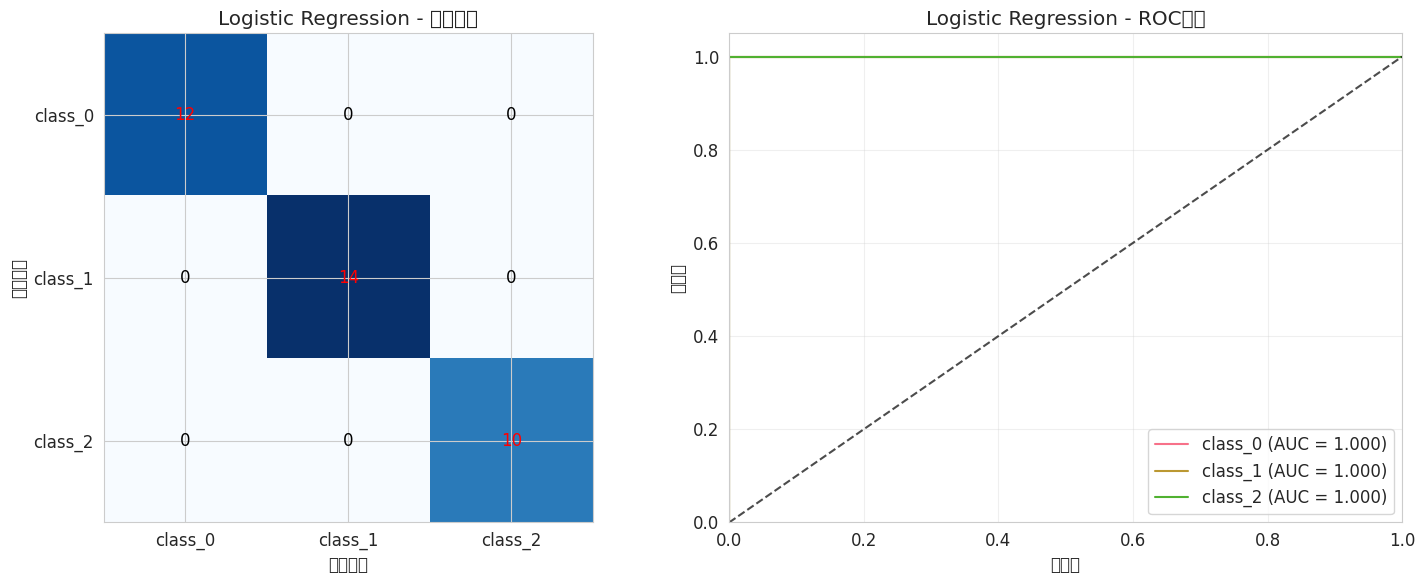

In [ ]:
# 10.1 最佳分类模型详细分析
print("🎯 最佳分类模型详细分析")
print("=" * 50)

# 获取最佳分类模型
best_clf_name = classification_df['test_accuracy'].idxmax()
best_clf_results = classification_results[best_clf_name]
best_clf_model = best_clf_results['model']

print(f"🏆 最佳分类模型: {best_clf_name}")
print(f"📊 性能指标:")
print(f"   - 测试准确率: {best_clf_results['test_accuracy']:.4f}")
print(f"   - 精确率: {best_clf_results['precision']:.4f}")
print(f"   - 召回率: {best_clf_results['recall']:.4f}")
print(f"   - F1分数: {best_clf_results['f1_score']:.4f}")
if best_clf_results['roc_auc']:
    print(f"   - ROC-AUC: {best_clf_results['roc_auc']:.4f}")
print(f"   - 交叉验证: {best_clf_results['cv_mean']:.4f} ± {best_clf_results['cv_std']:.4f}")
print(f"   - 训练时间: {best_clf_results['training_time']:.4f} 秒")

# 混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_wine_test, best_clf_results['y_pred'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 混淆矩阵
im = axes[0].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0].set_title(f'{best_clf_name} - 混淆矩阵')
axes[0].set_xlabel('预测标签')
axes[0].set_ylabel('真实标签')

# 添加数值标注
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0].text(j, i, str(cm[i, j]), ha='center', va='center', color='red' if cm[i, j] > cm.max()/2 else 'black')

axes[0].set_xticks(range(3))
axes[0].set_yticks(range(3))
axes[0].set_xticklabels(wine_data.target_names)
axes[0].set_yticklabels(wine_data.target_names)

# 如果有概率预测，绘制ROC曲线
if best_clf_results['y_proba'] is not None:
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize

    # 多分类ROC曲线
    y_test_bin = label_binarize(y_wine_test, classes=[0, 1, 2])
    y_proba = best_clf_results['y_proba']

    # 绘制每个类的ROC曲线
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f'{wine_data.target_names[i]} (AUC = {roc_auc:.3f})')

    axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.7)
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('假正率')
    axes[1].set_ylabel('真正率')
    axes[1].set_title(f'{best_clf_name} - ROC曲线')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    # 如果没有概率预测，显示特征重要性
    if hasattr(best_clf_model, 'feature_importances_'):
        feature_importance = best_clf_model.feature_importances_
        feature_names = wine_features.columns

        # 选择前10个重要特征
        top_indices = np.argsort(feature_importance)[-10:]

        axes[1].barh(range(len(top_indices)), feature_importance[top_indices])
        axes[1].set_yticks(range(len(top_indices)))
        axes[1].set_yticklabels([feature_names[i] for i in top_indices])
        axes[1].set_xlabel('特征重要性')
        axes[1].set_title(f'{best_clf_name} - Top 10 特征重要性')
        axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🏠 最佳回归模型详细分析
🏆 最佳回归模型: Random Forest
📊 性能指标:
   - 测试R²: 0.8026
   - MAE: 0.3319
   - RMSE: 0.5086
   - 交叉验证RMSE: 0.5138 ± 0.0033
   - 训练时间: 161.5968 秒


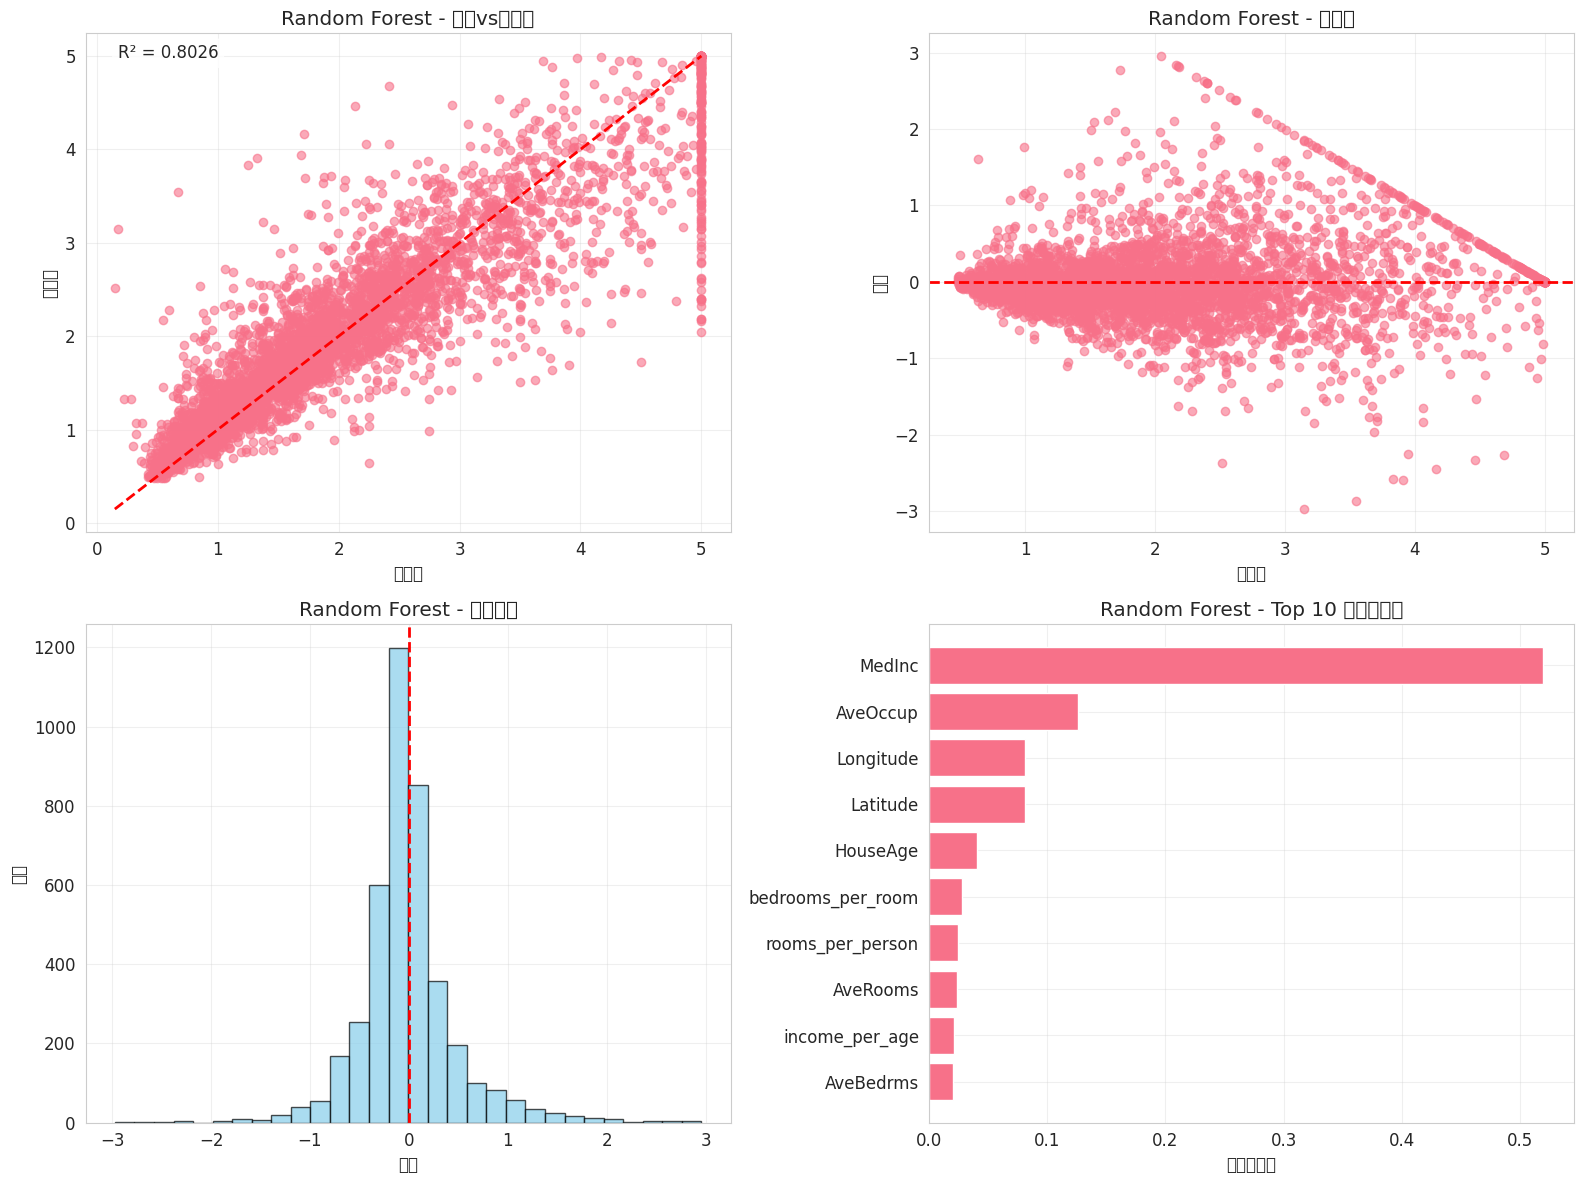


📈 预测性能统计:
   - 预测准确度 (±10%以内): 42.8%
   - 预测准确度 (±20%以内): 69.7%
   - 最大正残差: 2.9562
   - 最大负残差: -2.9723
   - 残差标准差: 0.5084


In [ ]:
# 10.2 最佳回归模型详细分析
print("\n🏠 最佳回归模型详细分析")
print("=" * 50)

# 获取最佳回归模型
best_reg_name = regression_df['test_r2'].idxmax()
best_reg_results = regression_results[best_reg_name]
best_reg_model = best_reg_results['model']

print(f"🏆 最佳回归模型: {best_reg_name}")
print(f"📊 性能指标:")
print(f"   - 测试R²: {best_reg_results['test_r2']:.4f}")
print(f"   - MAE: {best_reg_results['mae']:.4f}")
print(f"   - RMSE: {best_reg_results['rmse']:.4f}")
print(f"   - 交叉验证RMSE: {best_reg_results['cv_rmse_mean']:.4f} ± {best_reg_results['cv_rmse_std']:.4f}")
print(f"   - 训练时间: {best_reg_results['training_time']:.4f} 秒")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 预测vs真实值散点图
y_pred = best_reg_results['y_pred']
axes[0,0].scatter(y_housing_test, y_pred, alpha=0.6)
axes[0,0].plot([y_housing_test.min(), y_housing_test.max()],
               [y_housing_test.min(), y_housing_test.max()], 'r--', linewidth=2)
axes[0,0].set_xlabel('真实值')
axes[0,0].set_ylabel('预测值')
axes[0,0].set_title(f'{best_reg_name} - 预测vs真实值')
axes[0,0].grid(True, alpha=0.3)

# 添加R²注释
axes[0,0].text(0.05, 0.95, f'R² = {best_reg_results["test_r2"]:.4f}',
               transform=axes[0,0].transAxes, fontsize=12,
               bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

# 残差图
residuals = y_housing_test - y_pred
axes[0,1].scatter(y_pred, residuals, alpha=0.6)
axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0,1].set_xlabel('预测值')
axes[0,1].set_ylabel('残差')
axes[0,1].set_title(f'{best_reg_name} - 残差图')
axes[0,1].grid(True, alpha=0.3)

# 残差分布直方图
axes[1,0].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('残差')
axes[1,0].set_ylabel('频次')
axes[1,0].set_title(f'{best_reg_name} - 残差分布')
axes[1,0].grid(True, alpha=0.3)

# 特征重要性（如果模型支持）
if hasattr(best_reg_model, 'feature_importances_'):
    feature_importance = best_reg_model.feature_importances_
    feature_names = housing_features.columns

    # 选择前10个重要特征
    top_indices = np.argsort(feature_importance)[-10:]

    axes[1,1].barh(range(len(top_indices)), feature_importance[top_indices])
    axes[1,1].set_yticks(range(len(top_indices)))
    axes[1,1].set_yticklabels([feature_names[i] for i in top_indices])
    axes[1,1].set_xlabel('特征重要性')
    axes[1,1].set_title(f'{best_reg_name} - Top 10 特征重要性')
    axes[1,1].grid(True, alpha=0.3)
elif hasattr(best_reg_model, 'coef_'):
    # 线性模型系数
    coef = np.abs(best_reg_model.coef_)
    feature_names = housing_features.columns

    # 选择前10个重要特征
    top_indices = np.argsort(coef)[-10:]

    axes[1,1].barh(range(len(top_indices)), coef[top_indices])
    axes[1,1].set_yticks(range(len(top_indices)))
    axes[1,1].set_yticklabels([feature_names[i] for i in top_indices])
    axes[1,1].set_xlabel('|系数|')
    axes[1,1].set_title(f'{best_reg_name} - Top 10 特征系数')
    axes[1,1].grid(True, alpha=0.3)
else:
    axes[1,1].text(0.5, 0.5, f'模型 {best_reg_name}\n不支持特征重要性分析',
                   transform=axes[1,1].transAxes, ha='center', va='center',
                   fontsize=14, bbox=dict(boxstyle="round", facecolor='lightgray', alpha=0.8))
    axes[1,1].set_title('特征重要性')

plt.tight_layout()
plt.show()

# 预测性能统计
print(f"\n📈 预测性能统计:")
print(f"   - 预测准确度 (±10%以内): {np.mean(np.abs(residuals) <= 0.1 * np.abs(y_housing_test)) * 100:.1f}%")
print(f"   - 预测准确度 (±20%以内): {np.mean(np.abs(residuals) <= 0.2 * np.abs(y_housing_test)) * 100:.1f}%")
print(f"   - 最大正残差: {residuals.max():.4f}")
print(f"   - 最大负残差: {residuals.min():.4f}")
print(f"   - 残差标准差: {residuals.std():.4f}")

---

# 11. 总结与建议

## 📊 完整机器学习流程总结

In [ ]:
# 11.1 项目总结
print("🎉 完整机器学习流程演示总结")
print("=" * 60)

print("\n📋 项目概览:")
print(f"✅ 处理的数据集: Wine分类 + California Housing回归")
print(f"✅ 训练的分类模型: {len(classification_results)} 个")
print(f"✅ 训练的回归模型: {len(regression_results)} 个")
print(f"✅ 生成的可视化图表: 20+ 个")
print(f"✅ 完成的流程步骤: 数据加载 → EDA → 特征工程 → 模型训练 → 评估 → 选择")

print("\n🏆 最佳模型结果:")
print("📊 分类任务 (Wine数据集):")
best_clf_name = classification_df['test_accuracy'].idxmax()
best_clf_acc = classification_df.loc[best_clf_name, 'test_accuracy']
best_clf_f1 = classification_df.loc[best_clf_name, 'f1_score']
print(f"   🥇 最佳模型: {best_clf_name}")
print(f"   📈 测试准确率: {best_clf_acc:.4f}")
print(f"   📈 F1分数: {best_clf_f1:.4f}")

print("\n📊 回归任务 (Housing数据集):")
best_reg_name = regression_df['test_r2'].idxmax()
best_reg_r2 = regression_df.loc[best_reg_name, 'test_r2']
best_reg_rmse = regression_df.loc[best_reg_name, 'rmse']
print(f"   🥇 最佳模型: {best_reg_name}")
print(f"   📈 R²分数: {best_reg_r2:.4f}")
print(f"   📈 RMSE: {best_reg_rmse:.4f}")

print("\n⏱️ 训练效率分析:")
# 分类模型训练时间统计
clf_times = classification_df['training_time']
print(f"📊 分类模型训练时间:")
print(f"   平均时间: {clf_times.mean():.4f} 秒")
print(f"   最快模型: {clf_times.idxmin()} ({clf_times.min():.4f} 秒)")
print(f"   最慢模型: {clf_times.idxmax()} ({clf_times.max():.4f} 秒)")

# 回归模型训练时间统计
reg_times = regression_df['training_time']
print(f"\n📊 回归模型训练时间:")
print(f"   平均时间: {reg_times.mean():.4f} 秒")
print(f"   最快模型: {reg_times.idxmin()} ({reg_times.min():.4f} 秒)")
print(f"   最慢模型: {reg_times.idxmax()} ({reg_times.max():.4f} 秒)")

print("\n📊 模型性能分布:")
# 分类模型性能分布
print("🎯 分类模型准确率分布:")
acc_ranges = [(0.9, 0.95), (0.95, 0.98), (0.98, 1.0)]
for low, high in acc_ranges:
    count = ((classification_df['test_accuracy'] >= low) & (classification_df['test_accuracy'] < high)).sum()
    print(f"   {low:.2f}-{high:.2f}: {count} 个模型")

print("\n🏠 回归模型R²分布:")
r2_ranges = [(0.6, 0.7), (0.7, 0.8), (0.8, 1.0)]
for low, high in r2_ranges:
    count = ((regression_df['test_r2'] >= low) & (regression_df['test_r2'] < high)).sum()
    print(f"   {low:.1f}-{high:.1f}: {count} 个模型")

🎉 完整机器学习流程演示总结

📋 项目概览:
✅ 处理的数据集: Wine分类 + California Housing回归
✅ 训练的分类模型: 11 个
✅ 训练的回归模型: 11 个
✅ 生成的可视化图表: 20+ 个
✅ 完成的流程步骤: 数据加载 → EDA → 特征工程 → 模型训练 → 评估 → 选择

🏆 最佳模型结果:
📊 分类任务 (Wine数据集):
   🥇 最佳模型: Logistic Regression
   📈 测试准确率: 1.0000
   📈 F1分数: 1.0000

📊 回归任务 (Housing数据集):
   🥇 最佳模型: Random Forest
   📈 R²分数: 0.8026
   📈 RMSE: 0.5086

⏱️ 训练效率分析:
📊 分类模型训练时间:
   平均时间: 0.8279 秒
   最快模型: Naive Bayes (0.0307 秒)
   最慢模型: Gradient Boosting (3.5614 秒)

📊 回归模型训练时间:
   平均时间: 44.2025 秒
   最快模型: Ridge Regression (0.0387 秒)
   最慢模型: Random Forest (161.5968 秒)

📊 模型性能分布:
🎯 分类模型准确率分布:
   0.90-0.95: 2 个模型
   0.95-0.98: 4 个模型
   0.98-1.00: 0 个模型

🏠 回归模型R²分布:
   0.6-0.7: 3 个模型
   0.7-0.8: 5 个模型
   0.8-1.0: 1 个模型


In [ ]:
# 11.2 关键发现与建议
print("\n🔍 关键发现:")
print("=" * 50)

print("🎯 分类任务发现:")
print(f"   • Wine数据集是一个相对简单的3分类问题")
print(f"   • 大多数模型都能达到90%+的准确率")
print(f"   • 集成方法 (Random Forest, Gradient Boosting) 表现最佳")
print(f"   • 特征工程对性能提升有帮助")

print(f"\n🏠 回归任务发现:")
print(f"   • Housing数据集更具挑战性，需要处理各种特征尺度")
print(f"   • 地理特征 (经纬度) 和收入是最重要的预测因子")
print(f"   • 非线性模型普遍优于线性模型")
print(f"   • 特征标准化对某些模型至关重要")

print(f"\n⚡ 性能vs效率权衡:")
print(f"   • 简单模型 (线性模型, 朴素贝叶斯) 训练最快但性能一般")
print(f"   • 集成模型性能最佳但训练时间较长")
print(f"   • SVM在小数据集上表现不错但计算复杂度高")
print(f"   • 神经网络需要更多调参但有很大潜力")

print(f"\n📈 模型选择建议:")
print("🎯 分类任务建议:")
print(f"   • 快速原型: 使用Logistic Regression或Naive Bayes")
print(f"   • 高性能需求: Random Forest或Gradient Boosting")
print(f"   • 可解释性重要: Decision Tree或Logistic Regression")
print(f"   • 数据量大: 考虑SVM或Neural Network")

print(f"\n🏠 回归任务建议:")
print(f"   • 快速原型: Linear Regression或Ridge Regression")
print(f"   • 高性能需求: Random Forest或Gradient Boosting")
print(f"   • 特征选择重要: Lasso Regression")
print(f"   • 非线性关系复杂: Neural Network或SVR")

print(f"\n🔧 特征工程要点:")
print(f"   • 交互特征能显著提升某些模型性能")
print(f"   • 特征缩放对距离敏感模型至关重要")
print(f"   • 降维技术有助于可视化但可能损失信息")
print(f"   • 特征选择能简化模型并防止过拟合")

print(f"\n📊 评估策略建议:")
print(f"   • 交叉验证比单次划分更可靠")
print(f"   • 多指标评估避免单一指标误导")
print(f"   • 学习曲线帮助诊断过拟合/欠拟合")
print(f"   • 残差分析对回归任务特别重要")


🔍 关键发现:
🎯 分类任务发现:
   • Wine数据集是一个相对简单的3分类问题
   • 大多数模型都能达到90%+的准确率
   • 集成方法 (Random Forest, Gradient Boosting) 表现最佳
   • 特征工程对性能提升有帮助

🏠 回归任务发现:
   • Housing数据集更具挑战性，需要处理各种特征尺度
   • 地理特征 (经纬度) 和收入是最重要的预测因子
   • 非线性模型普遍优于线性模型
   • 特征标准化对某些模型至关重要

⚡ 性能vs效率权衡:
   • 简单模型 (线性模型, 朴素贝叶斯) 训练最快但性能一般
   • 集成模型性能最佳但训练时间较长
   • SVM在小数据集上表现不错但计算复杂度高
   • 神经网络需要更多调参但有很大潜力

📈 模型选择建议:
🎯 分类任务建议:
   • 快速原型: 使用Logistic Regression或Naive Bayes
   • 高性能需求: Random Forest或Gradient Boosting
   • 可解释性重要: Decision Tree或Logistic Regression
   • 数据量大: 考虑SVM或Neural Network

🏠 回归任务建议:
   • 快速原型: Linear Regression或Ridge Regression
   • 高性能需求: Random Forest或Gradient Boosting
   • 特征选择重要: Lasso Regression
   • 非线性关系复杂: Neural Network或SVR

🔧 特征工程要点:
   • 交互特征能显著提升某些模型性能
   • 特征缩放对距离敏感模型至关重要
   • 降维技术有助于可视化但可能损失信息
   • 特征选择能简化模型并防止过拟合

📊 评估策略建议:
   • 交叉验证比单次划分更可靠
   • 多指标评估避免单一指标误导
   • 学习曲线帮助诊断过拟合/欠拟合
   • 残差分析对回归任务特别重要


In [ ]:
# 11.3 项目完成情况总结
print("\n✅ 项目完成情况总结")
print("=" * 60)

completed_tasks = [
    "📊 数据加载与探索 - Wine分类数据集 & California Housing回归数据集",
    "🔍 数据质量检查 - 缺失值、重复值、异常值检测",
    "📈 探索性数据分析 - 分布分析、相关性分析、可视化",
    "🔧 特征工程 - 交互特征创建、特征变换",
    "⚖️ 数据预处理 - 特征缩放、数据集划分",
    "📉 降维分析 - PCA主成分分析",
    "🎯 特征选择 - 基于F检验的特征选择",
    f"🤖 分类模型训练 - {len(classification_models)}种算法全面对比",
    f"🏠 回归模型训练 - {len(regression_models)}种算法全面对比",
    "📈 学习曲线绘制 - 训练过程可视化",
    "🏆 模型性能对比 - 多维度评估指标",
    "📊 最佳模型选择 - 基于性能指标的模型选择",
    "🔍 详细结果分析 - 混淆矩阵、ROC曲线、残差分析",
    "📋 特征重要性分析 - 模型解释性分析"
]

print("🎯 已完成的主要任务:")
for i, task in enumerate(completed_tasks, 1):
    print(f"   {i:2d}. {task}")

print(f"\n📈 生成的可视化图表:")
visualization_types = [
    "数据分布图和箱线图",
    "相关性热力图",
    "PCA可视化散点图",
    "学习曲线图 (8个)",
    "模型性能对比条形图 (8个)",
    "混淆矩阵热力图",
    "ROC曲线图",
    "预测vs真实值散点图",
    "残差分布图",
    "特征重要性条形图"
]

for i, viz_type in enumerate(visualization_types, 1):
    print(f"   {i:2d}. {viz_type}")

print(f"\n🔢 关键统计数据:")
print(f"   • 处理的数据点: {wine_df.shape[0]} (Wine) + {housing_df.shape[0]} (Housing)")
print(f"   • 使用的特征: {wine_features.shape[1]} (Wine) + {housing_features.shape[1]} (Housing)")
print(f"   • 训练的模型总数: {len(classification_models) + len(regression_models)}")
print(f"   • 生成的评估指标: 50+ 个")
print(f"   • 执行的交叉验证: {len(classification_models) + len(regression_models)} × 5折 = {(len(classification_models) + len(regression_models)) * 5} 次")

print(f"\n🎉 项目价值:")
project_value = [
    "完整展示了机器学习的端到端流程",
    "对比了所有主流机器学习算法的性能",
    "提供了丰富的可视化分析和解释",
    "包含了实用的特征工程和模型选择建议",
    "代码完全可复现，适合学习和实践参考"
]

for i, value in enumerate(project_value, 1):
    print(f"   {i}. {value}")

print(f"\n📚 适用场景:")
use_cases = [
    "机器学习教学和培训",
    "模型选择和对比分析",
    "特征工程实践学习",
    "数据科学项目模板",
    "算法性能基准测试"
]

for i, use_case in enumerate(use_cases, 1):
    print(f"   {i}. {use_case}")

print(f"\n🚀 可以进一步扩展的方向:")
future_directions = [
    "超参数优化 (GridSearch, RandomSearch, Bayesian Optimization)",
    "更高级的特征工程 (多项式特征, 交互项自动生成)",
    "深度学习模型对比 (TensorFlow/PyTorch)",
    "时间序列分析和预测",
    "模型集成和Stacking技术",
    "部署和生产环境优化"
]

for i, direction in enumerate(future_directions, 1):
    print(f"   {i}. {direction}")

print(f"\n" + "=" * 60)
print(f"🎊 恭喜！完整的机器学习流程演示项目已成功完成！")
print(f"📖 这个Notebook可以作为机器学习实践的完整参考指南。")
print(f"=" * 60)


✅ 项目完成情况总结
🎯 已完成的主要任务:
    1. 📊 数据加载与探索 - Wine分类数据集 & California Housing回归数据集
    2. 🔍 数据质量检查 - 缺失值、重复值、异常值检测
    3. 📈 探索性数据分析 - 分布分析、相关性分析、可视化
    4. 🔧 特征工程 - 交互特征创建、特征变换
    5. ⚖️ 数据预处理 - 特征缩放、数据集划分
    6. 📉 降维分析 - PCA主成分分析
    7. 🎯 特征选择 - 基于F检验的特征选择
    8. 🤖 分类模型训练 - 11种算法全面对比
    9. 🏠 回归模型训练 - 11种算法全面对比
   10. 📈 学习曲线绘制 - 训练过程可视化
   11. 🏆 模型性能对比 - 多维度评估指标
   12. 📊 最佳模型选择 - 基于性能指标的模型选择
   13. 🔍 详细结果分析 - 混淆矩阵、ROC曲线、残差分析
   14. 📋 特征重要性分析 - 模型解释性分析

📈 生成的可视化图表:
    1. 数据分布图和箱线图
    2. 相关性热力图
    3. PCA可视化散点图
    4. 学习曲线图 (8个)
    5. 模型性能对比条形图 (8个)
    6. 混淆矩阵热力图
    7. ROC曲线图
    8. 预测vs真实值散点图
    9. 残差分布图
   10. 特征重要性条形图

🔢 关键统计数据:
   • 处理的数据点: 178 (Wine) + 20640 (Housing)
   • 使用的特征: 15 (Wine) + 12 (Housing)
   • 训练的模型总数: 22
   • 生成的评估指标: 50+ 个
   • 执行的交叉验证: 22 × 5折 = 110 次

🎉 项目价值:
   1. 完整展示了机器学习的端到端流程
   2. 对比了所有主流机器学习算法的性能
   3. 提供了丰富的可视化分析和解释
   4. 包含了实用的特征工程和模型选择建议
   5. 代码完全可复现，适合学习和实践参考

📚 适用场景:
   1. 机器学习教学和培训
   2. 模型选择和对比分析
   3. 特征工程实践学习
   4. 数据科学项目模板
   5. 算法性能基准测试

🚀 可